In [1]:
# Importing Necessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

# Connecting to SQL Database:

In [2]:
import os
import mysql.connector

In [3]:
# Making connections
connection = mysql.connector.connect(host = '54.255.64.49', port='3306', user='dm_team', password='DM!$Team@&27920!')
print(connection)

In [4]:
# to get database name
cursor = connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)
## connecting the database
connection = mysql.connector.connect(host = '54.255.64.49', port='3306', user='dm_team',
                                     password='DM!$Team@&27920!', database = 'project_itsm')


('information_schema',)
('project_itsm',)


In [5]:
# Getting table names
tables = pd.read_sql_query('show tables', connection)
print(tables)

  Tables_in_project_itsm
0           dataset_list


In [6]:
## query the table
query = 'select * from dataset_list'
#dataset = pd.read_sql(query,connection)
dataset = pd.read_csv('ITSM.csv') #--------->>> Please input ITSM.csv file here
print(dataset.shape)
dataset.head()


(46606, 25)


,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [8]:
# We can observe that all the features are of string datatype.
#The features which have integer and float values in them are also string

# Data Pre Processing & Imputation

In [9]:
value_count_cols =['CI_Cat','CI_Subcat','Status','Impact','Urgency','Priority','Category','Alert_Status','Closure_Code']
for fields in dataset[value_count_cols]:
    print(fields,':')
    print(dataset[fields].value_counts())
    print('----------------------------------------------')

CI_Cat :
application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: CI_Cat, dtype: int64
----------------------------------------------
CI_Subcat :
Server Based Application    18811
Web Based Application       15311
Desktop Application          3876
Laptop                       1921
SAP                          1199
                            ...  
Application Server              1
Virtual Tape Server             1
Security Software               1
NonStop Storage                 1
VMWare                          1
Name: CI_Subcat, Length: 64, dtype: int64
----------------------------------------------
Status :
Closed              46597
Work in progress        9
Name: Status, dtype: 

In [10]:
# A brief overview of the dataset:
# There are total of 46,606 instances.
# CI_Name total instances are populated in 3019 categories
# Similarly, 12, 64, 274 categories in CI_Cat, CI_Subcat, WBS respectively.
# Incident ID is unique for each incident. this shall be dropped as it maynot have any effect on prediciton.
# Nan values are present in Status, Impact, Urgency, Priority.
# all instances are divided in 4 Categories.

In [11]:
for feature in dataset.columns:
    data = dataset.copy()
    print(feature)
    dataset[feature].replace('', np.nan, inplace=True)
dataset.isnull().sum()

CI_Name
CI_Cat
CI_Subcat
WBS
Incident_ID
Status
Impact
Urgency
Priority
number_cnt
Category
KB_number
Alert_Status
No_of_Reassignments
Open_Time
Reopen_Time
Resolved_Time
Close_Time
Handle_Time_hrs
Closure_Code
No_of_Related_Interactions
Related_Interaction
No_of_Related_Incidents
No_of_Related_Changes
Related_Change


CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [12]:
# Impact feature has 1380 instances labelled NS. They are same 1380 instances of priority column that have been labelled NA.
# Extracting them and filling them with mode values of the respective columns.

In [13]:
dataset[dataset.Impact=='NS']   #1380 instances having NS values in Impact and NA in priority.

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
8,WBA000124,application,Web Based Application,WBS000088,IM0000017,Closed,NS,3,NaN,0.269574,incident,KM0000611,closed,2.0,29-08-2012 15:59,NaN,08-11-2013 14:02,08-11-2013 14:02,"0,862777778",Other,1.0,SD0000036,NaN,NaN,NaN
103,SBA000782,application,Server Based Application,WBS000043,IM0000151,Closed,NS,3,NaN,0.610829,incident,KM0001763,closed,1.0,11-06-2013 16:17,NaN,17-10-2013 15:03,17-10-2013 15:03,"9,64,76,66,667",Other,1.0,SD0000177,NaN,NaN,NaN
147,SBA000782,application,Server Based Application,WBS000043,IM0000199,Closed,NS,3,NaN,0.724279,incident,KM0001762,closed,2.0,11-07-2013 11:48,NaN,09-12-2013 14:49,09-12-2013 14:50,"11,26,525",Other,1.0,SD0000228,NaN,NaN,NaN
152,SBA000782,application,Server Based Application,WBS000043,IM0000205,Closed,NS,3,NaN,0.374449,incident,KM0001763,closed,1.0,12-07-2013 09:07,NaN,09-12-2013 14:46,09-12-2013 14:46,"1,11,86,48,333",Other,1.0,SD0000233,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46424,SBA000172,application,Server Based Application,WBS000014,IM0046873,Closed,NS,3,NaN,0.343793,incident,KM0000426,closed,0.0,31-03-2014 08:19,NaN,31-03-2014 09:20,31-03-2014 09:20,"1,01,97,22,222",Other,1.0,SD0146117,NaN,NaN,NaN
46446,ADB000010,database,Database,WBS000239,IM0046895,Closed,NS,3,NaN,0.647066,incident,KM0000940,closed,0.0,31-03-2014 08:13,NaN,31-03-2014 11:14,31-03-2014 11:14,"3,01,11,11,111",User error,1.0,SD0146192,NaN,NaN,NaN
46484,SBA000759,application,Server Based Application,WBS000296,IM0046934,Closed,NS,3,NaN,0.722611,incident,KM0001253,closed,0.0,31-03-2014 10:47,NaN,31-03-2014 11:10,31-03-2014 11:10,"0,39",Other,1.0,SD0146455,NaN,NaN,NaN
46553,CNT000046,storage,Controller,WBS000183,IM0047005,Closed,NS,3,NaN,0.123493,incident,KM0001141,closed,0.0,31-03-2014 12:33,NaN,31-03-2014 20:35,31-03-2014 20:35,"0,485277778",Hardware,1.0,SD0146607,NaN,NaN,NaN


In [14]:
dataset.replace('NS', np.nan, inplace=True)
dataset.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                         1380
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [15]:
# All empty strings and other values in places of nan has been coverted to nan. Now fill the empty values
dataset['Priority'].fillna(value=(dataset['Priority'].mode()[0]), inplace=True)
dataset['Impact'].fillna(value=(dataset['Impact'].mode()[0]), inplace=True)
dataset['CI_Cat'].fillna(method='bfill', inplace=True)
dataset['CI_Subcat'].fillna(method='bfill', inplace=True)
dataset['No_of_Reassignments'].fillna(method='bfill', inplace=True)
dataset['Closure_Code'].fillna(value=(dataset['Closure_Code'].mode()[0]), inplace=True)
dataset.isnull().sum()


CI_Name                           0
CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               0
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                      0
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [16]:
# from dataset, we can observe that, resolved time, is same as close time or just a few minutes before close time.
#therefore we can drop resolved time
dataset.drop(['Resolved_Time'], axis=1, inplace=True)

In [17]:
# 'No_of_Related_Interactions' AND 'Related_Interaction' :
# No. of related interactions - this represents how many number of tickets, related to the instance have been solved.
# the related instance have been mentioned in the column 'Related_Interaction'
#Most values in No. of related interaction is 1. and 1 ticket have been mentioned in Related interaction.
#If more no. of related interactions have happened, #Multivalue is mentioned in 'Related Interaction'
#By this we can infer that, Related interaction column only has Id numbers and actual information can be obtained from other column.
# we can drop related interaction and fill the nan values in No. of related incteractions column with 0.

In [18]:
dataset.drop(['Related_Interaction'], axis=1, inplace=True)

In [19]:
dataset['No_of_Related_Interactions'].fillna(value=0, inplace=True)

In [20]:
# No_of_Related_Incidents : 45384/46606 values are empty.
#the number of related incidents if any have been mentioned in this column. Remaining values, we can fill with 0
dataset['No_of_Related_Incidents'].fillna(value=0, inplace=True)

In [21]:
# 'No_of_Related_Changes' AND 'Related_Change' :
# If there is any related change wrt a given incident, corresponding incident ID have been mentioned in Related change column
# For the ID mentioned in related change, the number 1 is mentioned in No_of_Related_Changes
# If multiple changes have been made wrt a given incident, #MULTIVALUE is mentioned in Related changes
# and corresponding number have been mentioned in No_of_Related_Changes.
#Therefore lets drop Related_Change. and fill empty values in No_of_Related_Changes with 0.

In [22]:
dataset.drop(['Related_Change'], axis=1, inplace=True)

In [23]:
dataset['No_of_Related_Changes'].fillna(value=0, inplace=True)

In [24]:
dataset.isnull().sum()

CI_Name                           0
CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               0
Open_Time                         0
Reopen_Time                   44322
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                      0
No_of_Related_Interactions        0
No_of_Related_Incidents           0
No_of_Related_Changes             0
dtype: int64

# Handling date-time vaiables (temporal variables):

In [25]:
import datetime as dt

#Getting datetime variables:
dt_variables = [feature for feature in dataset.columns if 'Time' in feature]
dt_variables

['Open_Time', 'Reopen_Time', 'Close_Time', 'Handle_Time_hrs']

In [26]:
# Lets create a feature in dataset 'Reopen_Y/N' which says if the ticket has been reopened or not represented by 1 and 0

In [27]:
dataset['Reopen_Y/N'] = np.where(dataset['Reopen_Time'].isnull(),0,1)
dataset.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Reopen_Y/N
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,NaN,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,2.0,0.0,0
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,1.0,0.0,1
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,4,3,4.0,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,0.0,0.0,0
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,0.0,0.0,0
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,NaN,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,0.0,0.0,0


In [28]:
# We can observe from the data that, handle_time_hrs is the time taken from open time to close time
# Lets make handle time hours easily readable


In [29]:
dataset['Open_Time']= pd.to_datetime(dataset['Open_Time'], format='%d-%m-%Y %H:%M')
dataset['Reopen_Time']= pd.to_datetime(dataset['Reopen_Time'], format='%d-%m-%Y %H:%M')
dataset['Close_Time']= pd.to_datetime(dataset['Close_Time'], format='%d-%m-%Y %H:%M')

dataset[dt_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Open_Time        46606 non-null  datetime64[ns]
 1   Reopen_Time      2284 non-null   datetime64[ns]
 2   Close_Time       46606 non-null  datetime64[ns]
 3   Handle_Time_hrs  46605 non-null  object        
dtypes: datetime64[ns](3), object(1)
memory usage: 1.4+ MB


In [30]:
dataset.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Reopen_Y/N
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,2012-02-05 13:32:00,NaT,2013-11-04 13:51:00,"3,87,16,91,111",Other,1.0,2.0,0.0,0
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,2012-03-12 15:44:00,2013-12-02 12:31:00,2013-12-02 12:36:00,"4,35,47,86,389",Software,1.0,1.0,0.0,1
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,4,3,4.0,0.517551,request for information,KM0000339,closed,3.0,2012-03-29 12:36:00,NaT,2014-01-13 15:13:00,"4,84,31,19,444",No error - works as designed,1.0,0.0,0.0,0
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,2012-07-17 11:49:00,NaT,2013-11-14 09:31:00,"4,32,18,33,333",Operator error,1.0,0.0,0.0,0
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,2012-08-10 11:01:00,NaT,2013-11-08 13:55:00,"3,38,39,03,333",Other,1.0,0.0,0.0,0


In [31]:
# Lets create 2 columns describing time elasped from Open time and closed time till present time
from datetime import date, time, timedelta, datetime

In [32]:
# Lets create a column 'handle_time' by determining difference between open time and close time
dataset['Handle_Time'] = (dataset['Close_Time']-dataset['Open_Time'])

In [33]:
# Lets create a column which indicates the time elasped bwteen open time and reopen time
# this denototed idle time
dataset['Idle_Time'] = dataset['Reopen_Time']-dataset['Open_Time']

In [34]:
dataset['Idle_Time'].replace(np.nan, (pd.Timedelta('0 days 00:00:00')), inplace=True)

In [35]:
# Now we have created meaningfull columns derived from 'Handle_Time_hrs' and 'Reopen_Time.'
# Lets drop the previous columns from the dataset.

dataset.drop(['Reopen_Time','Handle_Time_hrs'], axis=1, inplace=True)

#'Incident_ID' feature is a unique id assigned to individual incidents
# It may not impact model prediction. therefore dropping it
dataset.drop(['Incident_ID'], axis=1, inplace=True)
dataset.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Close_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Reopen_Y/N,Handle_Time,Idle_Time
0,SUB000508,subapplication,Web Based Application,WBS000162,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,2012-02-05 13:32:00,2013-11-04 13:51:00,Other,1.0,2.0,0.0,0,638 days 00:19:00,0 days 00:00:00
1,WBA000124,application,Web Based Application,WBS000088,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,2012-03-12 15:44:00,2013-12-02 12:36:00,Software,1.0,1.0,0.0,1,629 days 20:52:00,629 days 20:47:00
2,DTA000024,application,Desktop Application,WBS000092,Closed,4,3,4.0,0.517551,request for information,KM0000339,closed,3.0,2012-03-29 12:36:00,2014-01-13 15:13:00,No error - works as designed,1.0,0.0,0.0,0,655 days 02:37:00,0 days 00:00:00
3,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,2012-07-17 11:49:00,2013-11-14 09:31:00,Operator error,1.0,0.0,0.0,0,484 days 21:42:00,0 days 00:00:00
4,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,2012-08-10 11:01:00,2013-11-08 13:55:00,Other,1.0,0.0,0.0,0,455 days 02:54:00,0 days 00:00:00


In [36]:
dataset.isnull().sum()

CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
KB_number                     0
Alert_Status                  0
No_of_Reassignments           0
Open_Time                     0
Close_Time                    0
Closure_Code                  0
No_of_Related_Interactions    0
No_of_Related_Incidents       0
No_of_Related_Changes         0
Reopen_Y/N                    0
Handle_Time                   0
Idle_Time                     0
dtype: int64

In [37]:
# replacing the value '5 - Very Low' from Urgency column with a numeric value
dataset.replace('5 - Very Low', 5, inplace=True)

In [38]:
# lets convert Impact and Urgency columns from object to numeric dtye
dataset['Impact'] = pd.to_numeric(dataset['Impact'])
dataset['Urgency']=pd.to_numeric(dataset['Urgency'])
dataset['Priority']=dataset.Priority.astype(float).astype(int)

In [39]:
dataset.info() # The said columns have been converted to int datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   CI_Name                     46606 non-null  object         
 1   CI_Cat                      46606 non-null  object         
 2   CI_Subcat                   46606 non-null  object         
 3   WBS                         46606 non-null  object         
 4   Status                      46606 non-null  object         
 5   Impact                      46606 non-null  int64          
 6   Urgency                     46606 non-null  int64          
 7   Priority                    46606 non-null  int32          
 8   number_cnt                  46606 non-null  float64        
 9   Category                    46606 non-null  object         
 10  KB_number                   46606 non-null  object         
 11  Alert_Status                46606 non-nul

In [40]:
# Lets create a feature 'FT_resolution' - first touch resolution which indicates which tickets have been solved--
# -- first time it was opened. without delaying and without reopening and re assigning
# It can be easily obtained by the fact that if a ticket has not been reopened, then it is solved in first time.

In [41]:
dataset['FT_resolution'] = np.where((dataset['Reopen_Y/N']==0), 1,0)
dataset.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Close_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Reopen_Y/N,Handle_Time,Idle_Time,FT_resolution
0,SUB000508,subapplication,Web Based Application,WBS000162,Closed,4,4,4,0.601292,incident,KM0000553,closed,26.0,2012-02-05 13:32:00,2013-11-04 13:51:00,Other,1.0,2.0,0.0,0,638 days 00:19:00,0 days 00:00:00,1
1,WBA000124,application,Web Based Application,WBS000088,Closed,3,3,3,0.415050,incident,KM0000611,closed,33.0,2012-03-12 15:44:00,2013-12-02 12:36:00,Software,1.0,1.0,0.0,1,629 days 20:52:00,629 days 20:47:00,0
2,DTA000024,application,Desktop Application,WBS000092,Closed,4,3,4,0.517551,request for information,KM0000339,closed,3.0,2012-03-29 12:36:00,2014-01-13 15:13:00,No error - works as designed,1.0,0.0,0.0,0,655 days 02:37:00,0 days 00:00:00,1
3,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4,0.642927,incident,KM0000611,closed,13.0,2012-07-17 11:49:00,2013-11-14 09:31:00,Operator error,1.0,0.0,0.0,0,484 days 21:42:00,0 days 00:00:00,1
4,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4,0.345258,incident,KM0000611,closed,2.0,2012-08-10 11:01:00,2013-11-08 13:55:00,Other,1.0,0.0,0.0,0,455 days 02:54:00,0 days 00:00:00,1


In [42]:
# Converting Handle time and idle time into No. of hours
dataset['Handle_Time']= dataset['Handle_Time']*24
dataset['Idle_Time']= dataset['Idle_Time']*24

dataset.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Close_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Reopen_Y/N,Handle_Time,Idle_Time,FT_resolution
0,SUB000508,subapplication,Web Based Application,WBS000162,Closed,4,4,4,0.601292,incident,KM0000553,closed,26.0,2012-02-05 13:32:00,2013-11-04 13:51:00,Other,1.0,2.0,0.0,0,15312 days 07:36:00,0 days 00:00:00,1
1,WBA000124,application,Web Based Application,WBS000088,Closed,3,3,3,0.415050,incident,KM0000611,closed,33.0,2012-03-12 15:44:00,2013-12-02 12:36:00,Software,1.0,1.0,0.0,1,15116 days 20:48:00,15116 days 18:48:00,0
2,DTA000024,application,Desktop Application,WBS000092,Closed,4,3,4,0.517551,request for information,KM0000339,closed,3.0,2012-03-29 12:36:00,2014-01-13 15:13:00,No error - works as designed,1.0,0.0,0.0,0,15722 days 14:48:00,0 days 00:00:00,1
3,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4,0.642927,incident,KM0000611,closed,13.0,2012-07-17 11:49:00,2013-11-14 09:31:00,Operator error,1.0,0.0,0.0,0,11637 days 16:48:00,0 days 00:00:00,1
4,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4,0.345258,incident,KM0000611,closed,2.0,2012-08-10 11:01:00,2013-11-08 13:55:00,Other,1.0,0.0,0.0,0,10922 days 21:36:00,0 days 00:00:00,1


In [43]:
# Converting timedelta format to float format:
dataset['Handle_Time']=dataset['Handle_Time'].astype('timedelta64[D]')
dataset['Idle_Time']=dataset['Idle_Time'].astype('timedelta64[D]')
dataset.head()


,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Close_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Reopen_Y/N,Handle_Time,Idle_Time,FT_resolution
0,SUB000508,subapplication,Web Based Application,WBS000162,Closed,4,4,4,0.601292,incident,KM0000553,closed,26.0,2012-02-05 13:32:00,2013-11-04 13:51:00,Other,1.0,2.0,0.0,0,15312.0,0.0,1
1,WBA000124,application,Web Based Application,WBS000088,Closed,3,3,3,0.415050,incident,KM0000611,closed,33.0,2012-03-12 15:44:00,2013-12-02 12:36:00,Software,1.0,1.0,0.0,1,15116.0,15116.0,0
2,DTA000024,application,Desktop Application,WBS000092,Closed,4,3,4,0.517551,request for information,KM0000339,closed,3.0,2012-03-29 12:36:00,2014-01-13 15:13:00,No error - works as designed,1.0,0.0,0.0,0,15722.0,0.0,1
3,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4,0.642927,incident,KM0000611,closed,13.0,2012-07-17 11:49:00,2013-11-14 09:31:00,Operator error,1.0,0.0,0.0,0,11637.0,0.0,1
4,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4,0.345258,incident,KM0000611,closed,2.0,2012-08-10 11:01:00,2013-11-08 13:55:00,Other,1.0,0.0,0.0,0,10922.0,0.0,1


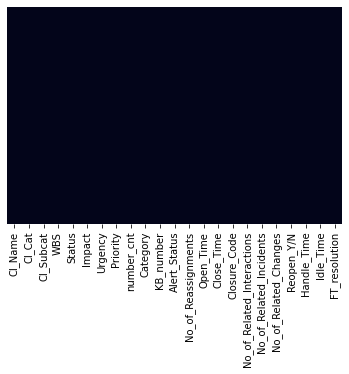

In [44]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False)

# Exploratory Data Analysis

In [45]:
dataset.describe()

,Impact,Urgency,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Reopen_Y/N,Handle_Time,Idle_Time,FT_resolution
count,46606.000000,46606.000000,46606.000000,46606.000000,46606.000000,46606.000000,46606.000000,46606.000000,46606.000000,46606.000000,46606.000000,46606.000000
mean,4.217011,4.189546,4.209415,0.499658,1.131807,1.147084,0.043771,0.012724,0.049007,122.666695,11.548620,0.950993
std,0.695984,0.724745,0.696060,0.288634,2.269756,2.553841,0.602799,0.123554,0.215884,452.786616,166.727492,0.215884
min,1.000000,1.000000,1.000000,0.000023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,4.000000,0.248213,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,4.000000,4.000000,4.000000,0.500269,0.000000,1.000000,0.000000,0.000000,0.000000,18.000000,0.000000,1.000000
75%,5.000000,5.000000,5.000000,0.749094,2.000000,1.000000,0.000000,0.000000,0.000000,95.000000,0.000000,1.000000
max,5.000000,5.000000,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000,1.000000,15722.000000,15116.000000,1.000000


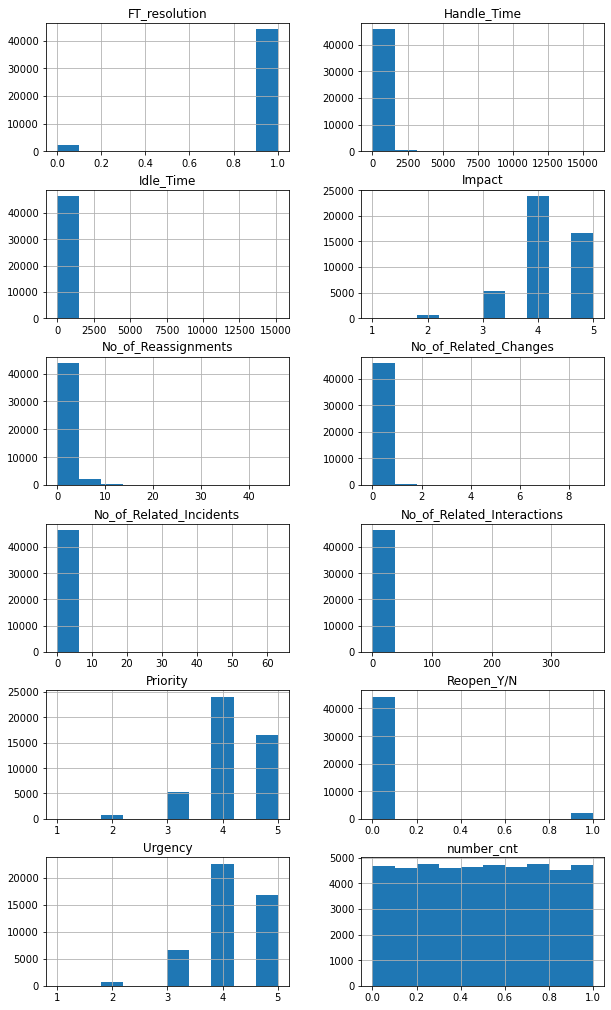

In [46]:
dataset.hist(figsize=(10,30), layout=(10,2))
plt.show()

In [47]:
# We can observe that most incidents have Impact, urgency, and priorities of 4(>=20000) & 5(>=15000).
# Number_cnt is uniformly distributed in the range of 0 to 1.
# No_of_Reassignments, No_of_Related_Interactions, No_of_Related_Incidents, No_of_Related_Changes, Reopen_Y/N values-
# --are very less which is a good sign and indicated higher efficiency of an ITSM process.
# from reopen y/n and FT_resolution columns we can observe that majority of tickets - over 40000 have been solved at first time


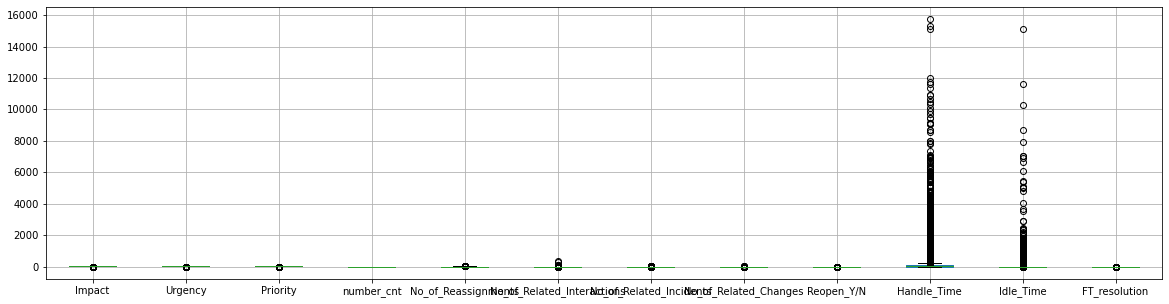

In [48]:
dataset.boxplot(figsize=(20,5))
plt.show()
# We can observe that majority of data is distributed within a specific range. Noise/Outliers are minimum

# Analyzing Numerical Features:

In [49]:
# Lets determine the numerical variables in out dataset:

numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype !='O']
# if the datatype is not equal to String 'O', then automatically it is numerical feature

print('Number of Numerical variables:', len(numerical_features))

#Print head of numerical features:
dataset[numerical_features].head()

Number of Numerical variables: 14


,Impact,Urgency,Priority,number_cnt,No_of_Reassignments,Open_Time,Close_Time,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Reopen_Y/N,Handle_Time,Idle_Time,FT_resolution
0,4,4,4,0.601292,26.0,2012-02-05 13:32:00,2013-11-04 13:51:00,1.0,2.0,0.0,0,15312.0,0.0,1
1,3,3,3,0.415050,33.0,2012-03-12 15:44:00,2013-12-02 12:36:00,1.0,1.0,0.0,1,15116.0,15116.0,0
2,4,3,4,0.517551,3.0,2012-03-29 12:36:00,2014-01-13 15:13:00,1.0,0.0,0.0,0,15722.0,0.0,1
3,4,4,4,0.642927,13.0,2012-07-17 11:49:00,2013-11-14 09:31:00,1.0,0.0,0.0,0,11637.0,0.0,1
4,4,4,4,0.345258,2.0,2012-08-10 11:01:00,2013-11-08 13:55:00,1.0,0.0,0.0,0,10922.0,0.0,1


In [50]:
# Numerical features can be of 2 types: Continuous and Discrete
# to get discrete features: considering threshold of 10
discrete_features = [feature for feature in numerical_features if len(dataset[feature].unique())<10 and feature not in dt_variables]
print('Discrete Features Count:', len(discrete_features))
discrete_features

Discrete Features Count: 6


['Impact',
 'Urgency',
 'Priority',
 'No_of_Related_Changes',
 'Reopen_Y/N',
 'FT_resolution']

In [51]:
#Getting datetime variables again after preprocessing:
dt_variables = [feature for feature in dataset.columns if 'Time' in feature]
dt_variables

['Open_Time', 'Close_Time', 'Handle_Time', 'Idle_Time']

In [52]:
# Getting Continuous Features:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features+dt_variables]

print('Continuous features Count:', len(continuous_features))
continuous_features

Continuous features Count: 4


['number_cnt',
 'No_of_Reassignments',
 'No_of_Related_Interactions',
 'No_of_Related_Incidents']

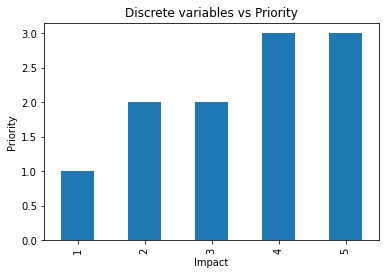

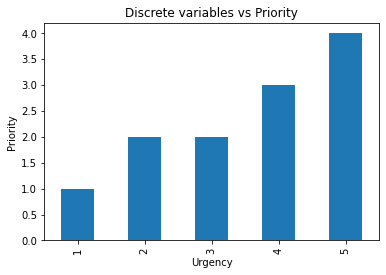

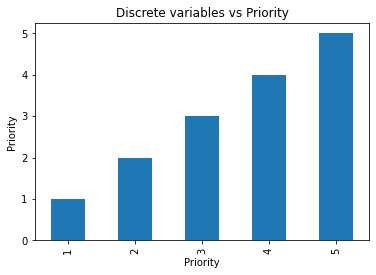

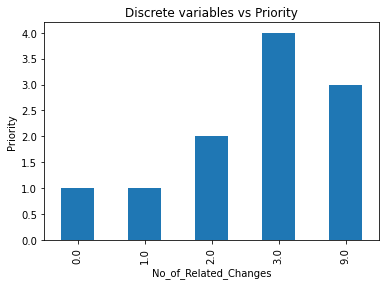

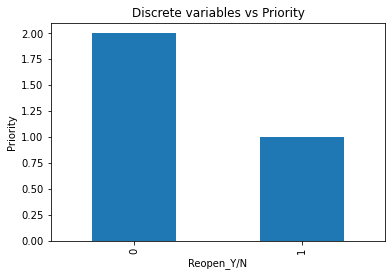

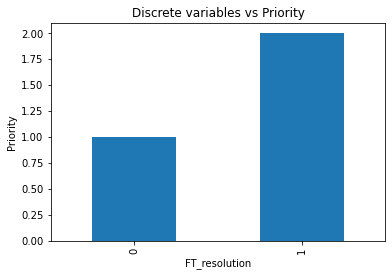

In [53]:
# Visualizing the relationship between discrete numerical features against 'Priority'
for feature in discrete_features:
    data = dataset.copy()
    data.groupby(feature)['Priority'].min().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Priority')
    plt.title('Discrete variables vs Priority')
    plt.show()

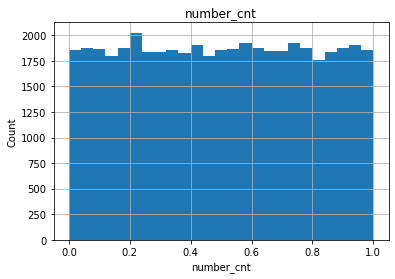

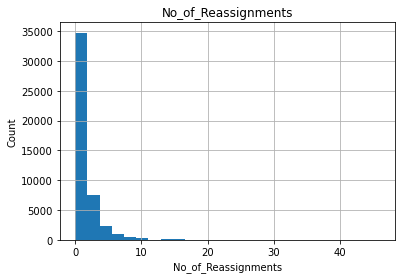

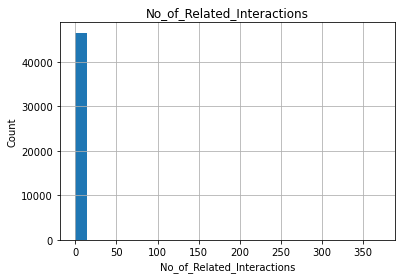

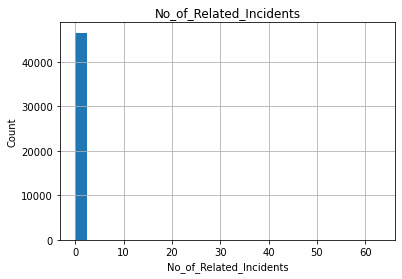

In [54]:
# Determining distribution of Continuous features using Histograms:

for feature in continuous_features:
    data = dataset.copy()
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

# Analyzing Categorical features:

In [55]:
# Getting all the categorical features:
categorical_features = [features for features in dataset.columns if dataset[features].dtype== 'O']
print('Number of Categorical Features:', len(categorical_features))
categorical_features

Number of Categorical Features: 9


['CI_Name',
 'CI_Cat',
 'CI_Subcat',
 'WBS',
 'Status',
 'Category',
 'KB_number',
 'Alert_Status',
 'Closure_Code']

In [56]:
# Cardinality of Categorical features:
for feature in categorical_features:
    print('The category is {} and No. of categories are {}' .format(feature, len(dataset[feature].unique())))

The category is CI_Name and No. of categories are 3019
The category is CI_Cat and No. of categories are 12
The category is CI_Subcat and No. of categories are 64
The category is WBS and No. of categories are 274
The category is Status and No. of categories are 2
The category is Category and No. of categories are 4
The category is KB_number and No. of categories are 1825
The category is Alert_Status and No. of categories are 1
The category is Closure_Code and No. of categories are 14


In [57]:
# Few features have high cardinality. lets create a separate group for them
# these features will be one hot coded and remaining will be label encoded
high_cardinality_cat_feat = [feature for feature in categorical_features if len(dataset[feature].unique())>10]
low_cardinality_cat_feat = [feature for feature in categorical_features if feature not in high_cardinality_cat_feat]
print(high_cardinality_cat_feat)
print()
print(low_cardinality_cat_feat)

['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'KB_number', 'Closure_Code']

['Status', 'Category', 'Alert_Status']


In [58]:
# lets determine top 10 categories which are top most repeated from each high cardinality categorical feature:
for feature in high_cardinality_cat_feat:
    data=dataset.copy()
    print(feature,': Top 10 categories :')
    print(data[feature].value_counts().nlargest(10))
    print('Sum of Instances included in top 10 categories of',feature,':',data[feature].value_counts().nlargest(10).sum())
    print('Percentage of Instances included in top 10 categories of',feature,'=',
          (data[feature].value_counts().nlargest(10).sum()/len(data[feature]))*100)
    print('----------------------------------------------------------')

CI_Name : Top 10 categories :
SUB000456    3050
SBA000263    2176
SBA000607    1743
SBA000462    1698
WBA000058    1614
WBA000133    1453
SUB000113    1100
WBA000011     945
WBA000144     909
DTA000616     851
Name: CI_Name, dtype: int64
Sum of Instances included in top 10 categories of CI_Name : 15539
Percentage of Instances included in top 10 categories of CI_Name = 33.341200703772046
----------------------------------------------------------
CI_Cat : Top 10 categories :
application          32985
subapplication        7798
computer              3650
storage                704
hardware               442
software               333
database               214
displaydevice          213
officeelectronics      153
networkcomponents      107
Name: CI_Cat, dtype: int64
Sum of Instances included in top 10 categories of CI_Cat : 46599
Percentage of Instances included in top 10 categories of CI_Cat = 99.984980474617
----------------------------------------------------------
CI_Subcat : Top 10 

In [59]:
# Lets determine the least priority value for each category of high cardinality categorical features.
# This will help us understand which categories will receive high priority tickets
for feature in high_cardinality_cat_feat:
    data= dataset.copy()
    pd.set_option('display.max_rows', None)
    temp=data.groupby(feature)['Priority'].min()
    print(temp.sort_values(ascending=True))

CI_Name
SUB000508    1
WBA000082    1
SUB000282    1
SUB000113    2
CBD001235    2
CBD001237    2
CBD000741    2
CBD000740    2
CBD000739    2
CBD000738    2
WBA000148    2
CBD001243    2
CBD001244    2
CBD000733    2
CBD000732    2
WSR000008    2
WSR000118    2
CBD000724    2
CBD000723    2
CBD000721    2
CBD000717    2
CBD000716    2
CBD000714    2
CBD000712    2
SBA000621    2
WSR000124    2
WSR000166    2
EXC000001    2
SBA000346    2
CBD000689    2
CBD000747    2
DTA000616    2
CBD001225    2
CBD000687    2
CBD000796    2
DTA000591    2
CBD000794    2
CBD000793    2
CBD000792    2
CBD000788    2
CBD000787    2
CBD000786    2
CBD000784    2
CBD000782    2
CBD000780    2
CBD000779    2
CBD000777    2
CBD001232    2
CBD000775    2
CBD000772    2
CBD001221    2
CBD000770    2
CBD000769    2
CBD000768    2
CBD000767    2
CBD000766    2
CBD000765    2
SBA000405    2
WBA000133    2
CBD001222    2
CBD000761    2
CBD000759    2
CBD001220    2
CBD000686    2
CBD000684    2
CBD000797    2
CB

Name: Priority, dtype: int32
KB_number
KM0000553    1
KM0001508    1
KM0002180    1
KM0001178    2
KM0000268    2
KM0000269    2
KM0000274    2
KM0000276    2
KM0000278    2
KM0000279    2
KM0000280    2
KM0000281    2
KM0000926    2
KM0000285    2
KM0000295    2
KM0000917    2
KM0000916    2
KM0000911    2
KM0000891    2
KM0000310    2
KM0001625    2
KM0000879    2
KM0000322    2
KM0001641    2
KM0001644    2
KM0000924    2
KM0000266    2
KM0000951    2
KM0000333    2
KM0001499    2
KM0001060    2
KM0001058    2
KM0000166    2
KM0001502    2
KM0002226    2
KM0001032    2
KM0001030    2
KM0001518    2
KM0001529    2
KM0000949    2
KM0001012    2
KM0002204    2
KM0001545    2
KM0001552    2
KM0000223    2
KM0000972    2
KM0000970    2
KM0000966    2
KM0002187    2
KM0001569    2
KM0000232    2
KM0001536    2
KM0000336    2
KM0000343    2
KM0000347    2
KM0000468    2
KM0000472    2
KM0002012    2
KM0001898    2
KM0000479    2
KM0000480    2
KM0002007    2
KM0000487    2
KM0000488    2
K

In [60]:
# Lets determine the least priority value for each category of LOW cardinality categorical features.
# This will help us understand which categories will receive high priority tickets
for feature in low_cardinality_cat_feat:
    data= dataset.copy()
    temp=data.groupby(feature)['Priority'].min()
    print(temp.sort_values(ascending=True))
    print()

Status
Closed              1
Work in progress    2
Name: Priority, dtype: int32

Category
incident                   1
request for information    2
complaint                  5
request for change         5
Name: Priority, dtype: int32

Alert_Status
closed    1
Name: Priority, dtype: int32



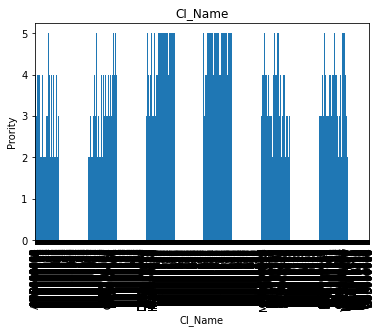

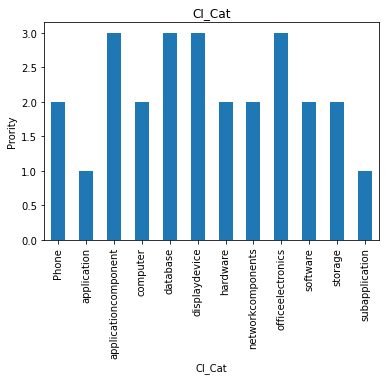

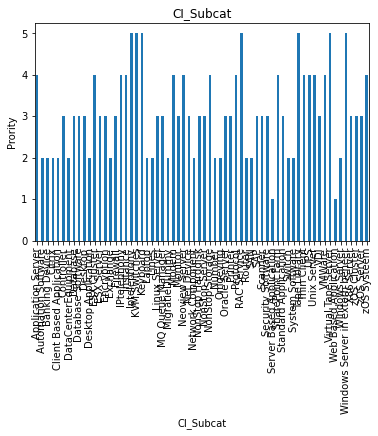

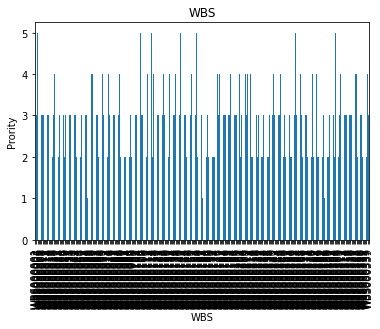

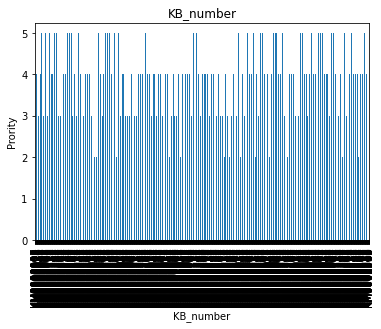

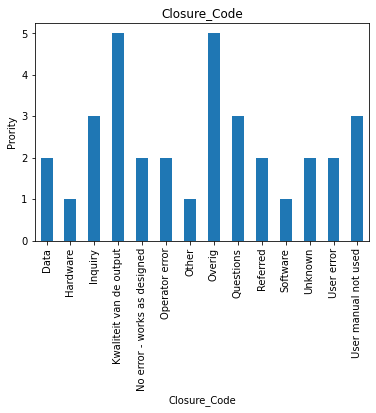

In [61]:
# Edit code to plot only top 10 categories in a particular categorical feature with respect to minimum of priority:
# We can see which categories has high priority tickets that is 1 and 2 priority.
for feature in high_cardinality_cat_feat:
    data= dataset.copy()
    data.groupby(feature)['Priority'].min().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Prority')
    plt.title(feature)
    plt.show()

# Checking and Removing Outliers

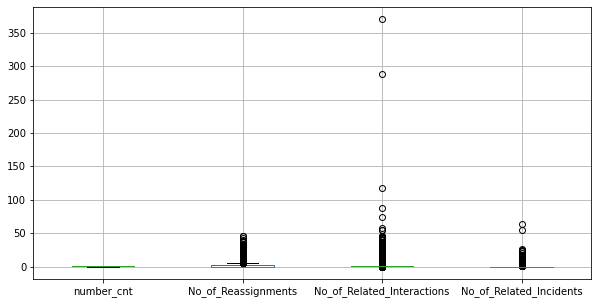

In [62]:
dataset[continuous_features].boxplot(figsize=(10,5))
plt.show()

In [63]:
# We can observe from the dataset.boxplot, that there are certain outliers. Lets determine them and remove those instances
# Notation 'OR'= Outlier Rows. Lets keep a threshold of 50. Remove outliers >50
no_of_reassignments_OR = dataset[dataset.No_of_Reassignments>50]
no_of_reassignments_OR
# No outliers in this feature

,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Close_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Reopen_Y/N,Handle_Time,Idle_Time,FT_resolution


In [64]:
no_of_related_interactions_OR = dataset[dataset.No_of_Related_Interactions>50]
no_of_related_interactions_OR

,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Close_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Reopen_Y/N,Handle_Time,Idle_Time,FT_resolution
167,CBA000014,application,Client Based Application,WBS000073,Closed,4,3,3,0.407017,incident,KM0001692,closed,3.0,2013-07-16 15:43:00,2013-10-10 12:17:00,Software,370.0,0.0,0.0,0,2060.0,0.0,1
229,SBA000462,application,Server Based Application,WBS000073,Closed,4,4,4,0.052164,incident,KM0001363,closed,3.0,2013-08-13 11:31:00,2013-11-21 13:02:00,Other,54.0,0.0,0.0,1,2401.0,2378.0,0
585,DTA000616,application,Desktop Application,WBS000092,Closed,4,4,4,0.819152,incident,KM0001526,closed,1.0,2013-09-24 09:26:00,2013-10-18 10:57:00,Other,288.0,0.0,0.0,1,577.0,71.0,0
14243,WBA000133,application,Web Based Application,WBS000073,Closed,4,4,4,0.365534,incident,KM0002152,closed,2.0,2013-11-18 12:07:00,2013-11-25 11:58:00,Software,88.0,0.0,0.0,0,167.0,0.0,1
16425,SBA000439,application,Server Based Application,WBS000219,Closed,5,5,5,0.535770,incident,KM0002083,closed,0.0,2013-11-25 15:20:00,2014-01-07 11:10:00,Unknown,74.0,10.0,0.0,0,1027.0,0.0,1
17887,SUB000424,subapplication,Web Based Application,WBS000073,Closed,4,4,4,0.504761,incident,KM0000702,closed,2.0,2013-12-02 09:55:00,2013-12-03 10:01:00,Software,57.0,0.0,1.0,0,24.0,0.0,1
30897,WBA000060,application,Web Based Application,WBS000073,Closed,4,4,4,0.049780,incident,KM0000825,closed,0.0,2014-01-27 09:10:00,2014-01-28 14:32:00,Software,118.0,2.0,0.0,0,29.0,0.0,1
31082,WBA000018,application,Web Based Application,WBS000073,Closed,3,3,3,0.529572,incident,KM0000793,closed,0.0,2014-01-27 11:49:00,2014-01-27 14:04:00,Hardware,55.0,1.0,0.0,0,2.0,0.0,1


In [65]:
no_of_related_incidents_OR = dataset[dataset.No_of_Related_Incidents>50]
no_of_related_incidents_OR

,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Close_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Reopen_Y/N,Handle_Time,Idle_Time,FT_resolution
11040,SBA000773,application,Server Based Application,WBS000285,Closed,2,2,2,0.176905,incident,KM0000926,closed,0.0,2013-11-06 07:55:00,2013-11-06 10:46:00,Software,1.0,54.0,0.0,0,2.0,0.0,1
40314,SBA000773,application,Server Based Application,WBS000285,Closed,2,2,2,0.097650,incident,KM0000036,closed,0.0,2014-03-02 05:33:00,2014-03-02 10:12:00,Software,1.0,63.0,0.0,0,4.0,0.0,1


In [66]:
dataset.drop(index=[167, 229, 585, 14243, 16425, 17887, 30897, 31082, 11040, 40314], inplace=True)

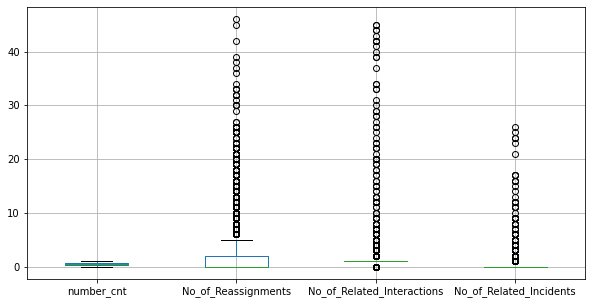

In [67]:
# Check for successful drop: dropping OK
dataset[continuous_features].boxplot(figsize=(10,5))

In [68]:
dataset.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Close_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Reopen_Y/N,Handle_Time,Idle_Time,FT_resolution
0,SUB000508,subapplication,Web Based Application,WBS000162,Closed,4,4,4,0.601292,incident,KM0000553,closed,26.0,2012-02-05 13:32:00,2013-11-04 13:51:00,Other,1.0,2.0,0.0,0,15312.0,0.0,1
1,WBA000124,application,Web Based Application,WBS000088,Closed,3,3,3,0.415050,incident,KM0000611,closed,33.0,2012-03-12 15:44:00,2013-12-02 12:36:00,Software,1.0,1.0,0.0,1,15116.0,15116.0,0
2,DTA000024,application,Desktop Application,WBS000092,Closed,4,3,4,0.517551,request for information,KM0000339,closed,3.0,2012-03-29 12:36:00,2014-01-13 15:13:00,No error - works as designed,1.0,0.0,0.0,0,15722.0,0.0,1
3,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4,0.642927,incident,KM0000611,closed,13.0,2012-07-17 11:49:00,2013-11-14 09:31:00,Operator error,1.0,0.0,0.0,0,11637.0,0.0,1
4,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4,0.345258,incident,KM0000611,closed,2.0,2012-08-10 11:01:00,2013-11-08 13:55:00,Other,1.0,0.0,0.0,0,10922.0,0.0,1


In [69]:
# Lets create a copy of the cleaned dataset for solving further problems:
dataset_clean = dataset.copy()
dataset.to_csv('cleaned_dataset.csv')

# Treating Categorical Features/ Encoding

In [70]:
# Lets Label Encode the low cardinality categorical features:
from sklearn.preprocessing import LabelEncoder

In [71]:
enc = LabelEncoder()
for feature in categorical_features:
    dataset[feature] = enc.fit_transform(dataset[feature])
dataset.head() 

,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Close_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Reopen_Y/N,Handle_Time,Idle_Time,FT_resolution
0,2741,11,57,137,0,4,4,4,0.601292,1,413,0,26.0,2012-02-05 13:32:00,2013-11-04 13:51:00,6,1.0,2.0,0.0,0,15312.0,0.0,1
1,2863,1,57,70,0,3,3,3,0.415050,1,456,0,33.0,2012-03-12 15:44:00,2013-12-02 12:36:00,10,1.0,1.0,0.0,1,15116.0,15116.0,0
2,990,1,10,74,0,4,3,4,0.517551,3,244,0,3.0,2012-03-29 12:36:00,2014-01-13 15:13:00,4,1.0,0.0,0.0,0,15722.0,0.0,1
3,2863,1,57,70,0,4,4,4,0.642927,1,456,0,13.0,2012-07-17 11:49:00,2013-11-14 09:31:00,5,1.0,0.0,0.0,0,11637.0,0.0,1
4,2863,1,57,70,0,4,4,4,0.345258,1,456,0,2.0,2012-08-10 11:01:00,2013-11-08 13:55:00,6,1.0,0.0,0.0,0,10922.0,0.0,1


In [72]:
# exporting the processed and enconded dataset to .csv file to be used later:
dataset.to_csv('encoded_data.csv')

# Feature Scaling:

In [73]:
# Scaling all categorical features with MinMax scaler:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [74]:
feature_scale = [feature for feature in categorical_features+['Handle_Time','Idle_Time']]
data1= pd.DataFrame(scale.fit_transform(dataset[feature_scale]), columns= feature_scale)
data1.head() 

,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Category,KB_number,Alert_Status,Closure_Code,Handle_Time,Idle_Time
0,0.908217,1.000000,0.904762,0.501832,0.0,0.333333,0.226425,0.0,0.461538,0.973922,0.0
1,0.948641,0.090909,0.904762,0.256410,0.0,0.333333,0.250000,0.0,0.769231,0.961455,1.0
2,0.328032,0.090909,0.158730,0.271062,0.0,1.000000,0.133772,0.0,0.307692,1.000000,0.0
3,0.948641,0.090909,0.904762,0.256410,0.0,0.333333,0.250000,0.0,0.384615,0.740173,0.0
4,0.948641,0.090909,0.904762,0.256410,0.0,0.333333,0.250000,0.0,0.461538,0.694695,0.0


In [75]:
dataset.drop(feature_scale, axis=1, inplace=True)

In [76]:
dataset=pd.concat([dataset,data1], axis=1, join='inner')

In [77]:
dataset.head()

,Impact,Urgency,Priority,number_cnt,No_of_Reassignments,Open_Time,Close_Time,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Reopen_Y/N,FT_resolution,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Category,KB_number,Alert_Status,Closure_Code,Handle_Time,Idle_Time
0,4,4,4,0.601292,26.0,2012-02-05 13:32:00,2013-11-04 13:51:00,1.0,2.0,0.0,0,1,0.908217,1.000000,0.904762,0.501832,0.0,0.333333,0.226425,0.0,0.461538,0.973922,0.0
1,3,3,3,0.415050,33.0,2012-03-12 15:44:00,2013-12-02 12:36:00,1.0,1.0,0.0,1,0,0.948641,0.090909,0.904762,0.256410,0.0,0.333333,0.250000,0.0,0.769231,0.961455,1.0
2,4,3,4,0.517551,3.0,2012-03-29 12:36:00,2014-01-13 15:13:00,1.0,0.0,0.0,0,1,0.328032,0.090909,0.158730,0.271062,0.0,1.000000,0.133772,0.0,0.307692,1.000000,0.0
3,4,4,4,0.642927,13.0,2012-07-17 11:49:00,2013-11-14 09:31:00,1.0,0.0,0.0,0,1,0.948641,0.090909,0.904762,0.256410,0.0,0.333333,0.250000,0.0,0.384615,0.740173,0.0
4,4,4,4,0.345258,2.0,2012-08-10 11:01:00,2013-11-08 13:55:00,1.0,0.0,0.0,0,1,0.948641,0.090909,0.904762,0.256410,0.0,0.333333,0.250000,0.0,0.461538,0.694695,0.0


In [78]:
dataset.isnull().sum()

Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
No_of_Reassignments           0
Open_Time                     0
Close_Time                    0
No_of_Related_Interactions    0
No_of_Related_Incidents       0
No_of_Related_Changes         0
Reopen_Y/N                    0
FT_resolution                 0
CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Status                        0
Category                      0
KB_number                     0
Alert_Status                  0
Closure_Code                  0
Handle_Time                   0
Idle_Time                     0
dtype: int64

In [79]:
# Exporting this scaled dataset to csv format for probable use in future
dataset.to_csv('scaled_data.csv')

## 1st Business Problem: 
### 'Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.'
### Target - 'Priority'
### Problem type - 'Classification'

In [80]:
# Defining X and y:
# In Classification Problem,Lets drop Open_time and Close time
X = dataset.drop(['Open_Time','Close_Time','Priority'], axis=1)
y = dataset.Priority

In [81]:
# Defining train test split:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10, test_size = 0.3)

# Handling Imbalanced dataset / SMOTEing

In [82]:
y.value_counts()
# We can observe the target variable is highly imbalanced. Therefore SMOTEing before model building

4    24086
5    16482
3     5320
2      695
1        3
Name: Priority, dtype: int64

In [83]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, recall_score
from imblearn.over_sampling import SMOTE
from collections import Counter

In [84]:
smote = SMOTE(random_state=13, k_neighbors=2)
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype(float), y_train)

In [85]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_smote))

Counter({4: 16857, 5: 11539, 3: 3715, 2: 496, 1: 3})
Counter({4: 16857, 3: 16857, 5: 16857, 2: 16857, 1: 16857})


# Feature Selection:

In [86]:
# Using ExtraTree Classifier:
from sklearn.ensemble import ExtraTreesClassifier

In [87]:
model = ExtraTreesClassifier(n_estimators=5, criterion='entropy', max_features=10)

In [88]:
model.fit(X_train_smote,y_train_smote)

ExtraTreesClassifier(criterion='entropy', max_features=10, n_estimators=5)

In [89]:
feature_importance = model.feature_importances_

In [90]:
feature_importance_normalized = np.std([tree.feature_importances_ for tree in model.estimators_], axis = 0) 

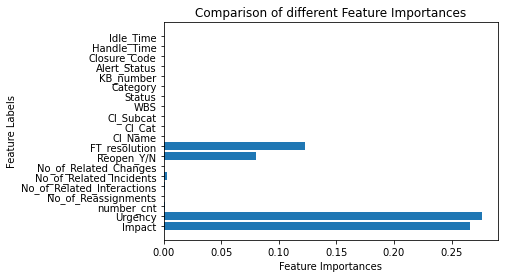

In [91]:
# Plotting a Bar Graph to compare the models 
plt.barh(X.columns, feature_importance_normalized) 
plt.xlabel('Feature Importances') 
plt.ylabel('Feature Labels') 
plt.title('Comparison of different Feature Importances') 
plt.show()

In [92]:
# extra tree classifier gives us 5 important features as displayed above

In [93]:
# Feature selection for Random forest classifier model
from sklearn.feature_selection import SelectFromModel
model = RandomForestClassifier()
feature_sel_model = SelectFromModel(model)
feature_sel_model.fit(X_train_smote,y_train_smote)

SelectFromModel(estimator=RandomForestClassifier())

In [94]:
feature_sel_model.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [95]:
# printing the number of total and selected features

selected_feat = X_train_smote.columns[(feature_sel_model.get_support())]

print('Total features:{}'.format((X_train_smote.shape[1])))
print('Selected Features:{}'.format(len(selected_feat)))
print('Selected Features:', selected_feat)

Total features:20
Selected Features:2
Selected Features: Index(['Impact', 'Urgency'], dtype='object')


# Model Deployment and Evaluation

In [96]:
#Using XGBoost Model:
model = XGBClassifier()
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print('Accuracy Score :',accuracy_score(y_test, y_predict))
print()
print('Precision_score',precision_score(y_test, y_predict, average=None))
print()
print('Recall Score', recall_score(y_test, y_predict, average=None))


Accuracy Score : 0.996994848311391

Precision_score [1.         0.99243856 0.99586036 1.        ]

Recall Score [1.         0.98130841 0.99834002 1.        ]


In [97]:
pd.crosstab(y_test, y_predict)

col_0,2,3,4,5
Priority,,,,
2,199,0,0,0
3,0,1575,30,0
4,0,12,7217,0
5,0,0,0,4943


In [98]:
# It can be noted that there are some mis predictions among 3 and 4 priority tickets.
# However, for our 1st business case, 1 and 2 tickets are accurately predicted.
# Lets also verify the model with cross validation

In [99]:
cross_val_score(model, X_train_smote, y_train_smote, n_jobs=4, cv=5, scoring='accuracy')

array([0.99602539, 0.99928813, 0.99964406, 0.99916948, 0.99916948])

In [100]:
# CRoss validation is yeilding an accuracy of upto 99.96%
# This model could be used to predict the right priority for any new ticket

## 2nd Business Problem: 
### 'Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.'
### Target - 'CI_Cat', 'CI_Subcat', 'Category'
### Problem type - 'Time Series Forecasting'

In [101]:
import datetime as dt
from pandas import datetime
from datetime import datetime, date, time, timedelta

In [102]:
dataset_clean = pd.read_csv('cleaned_dataset.csv')
dataset_clean.head()

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Close_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Reopen_Y/N,Handle_Time,Idle_Time,FT_resolution
0,0,SUB000508,subapplication,Web Based Application,WBS000162,Closed,4,4,4,0.601292,incident,KM0000553,closed,26.0,2012-02-05 13:32:00,2013-11-04 13:51:00,Other,1.0,2.0,0.0,0,15312.0,0.0,1
1,1,WBA000124,application,Web Based Application,WBS000088,Closed,3,3,3,0.415050,incident,KM0000611,closed,33.0,2012-03-12 15:44:00,2013-12-02 12:36:00,Software,1.0,1.0,0.0,1,15116.0,15116.0,0
2,2,DTA000024,application,Desktop Application,WBS000092,Closed,4,3,4,0.517551,request for information,KM0000339,closed,3.0,2012-03-29 12:36:00,2014-01-13 15:13:00,No error - works as designed,1.0,0.0,0.0,0,15722.0,0.0,1
3,3,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4,0.642927,incident,KM0000611,closed,13.0,2012-07-17 11:49:00,2013-11-14 09:31:00,Operator error,1.0,0.0,0.0,0,11637.0,0.0,1
4,4,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4,0.345258,incident,KM0000611,closed,2.0,2012-08-10 11:01:00,2013-11-08 13:55:00,Other,1.0,0.0,0.0,0,10922.0,0.0,1


In [103]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46596 entries, 0 to 46595
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  46596 non-null  int64  
 1   CI_Name                     46596 non-null  object 
 2   CI_Cat                      46596 non-null  object 
 3   CI_Subcat                   46596 non-null  object 
 4   WBS                         46596 non-null  object 
 5   Status                      46596 non-null  object 
 6   Impact                      46596 non-null  int64  
 7   Urgency                     46596 non-null  int64  
 8   Priority                    46596 non-null  int64  
 9   number_cnt                  46596 non-null  float64
 10  Category                    46596 non-null  object 
 11  KB_number                   46596 non-null  object 
 12  Alert_Status                46596 non-null  object 
 13  No_of_Reassignments         465

application             32976
subapplication           7797
computer                 3650
storage                   704
hardware                  442
software                  333
database                  214
displaydevice             213
officeelectronics         153
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: CI_Cat, dtype: int64


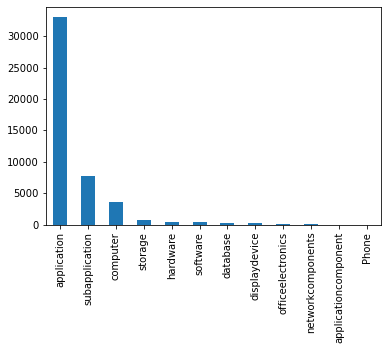

In [104]:
# Lets determine the total incident volume in each of the categories of 'CI_Cat' from 2012- 2014
print(dataset_clean['CI_Cat'].value_counts())
dataset_clean['CI_Cat'].value_counts().plot.bar()

In [105]:
# Lets create a Dataframe for CI_Cat categories and the ticket volume:
cols = ['CI_Cat', 'Open_Time', 'Close_Time','Handle_Time']
CI_Cat_data = dataset_clean[cols]
CI_Cat_data.head()

,CI_Cat,Open_Time,Close_Time,Handle_Time
0,subapplication,2012-02-05 13:32:00,2013-11-04 13:51:00,15312.0
1,application,2012-03-12 15:44:00,2013-12-02 12:36:00,15116.0
2,application,2012-03-29 12:36:00,2014-01-13 15:13:00,15722.0
3,application,2012-07-17 11:49:00,2013-11-14 09:31:00,11637.0
4,application,2012-08-10 11:01:00,2013-11-08 13:55:00,10922.0


In [106]:
CI_Cat_data['Open_Time']= pd.to_datetime(CI_Cat_data['Open_Time'], format='%Y-%m-%d')
CI_Cat_data['Open_Time'] = CI_Cat_data['Open_Time'].dt.strftime('%Y-%m-%d')

In [107]:
CI_Cat_data['Close_Time']= pd.to_datetime(CI_Cat_data['Close_Time'], format='%Y-%m-%d')
CI_Cat_data['Close_Time'] = CI_Cat_data['Close_Time'].dt.strftime('%Y-%m-%d')

In [108]:
CI_Cat_data.head()

,CI_Cat,Open_Time,Close_Time,Handle_Time
0,subapplication,2012-02-05,2013-11-04,15312.0
1,application,2012-03-12,2013-12-02,15116.0
2,application,2012-03-29,2014-01-13,15722.0
3,application,2012-07-17,2013-11-14,11637.0
4,application,2012-08-10,2013-11-08,10922.0


In [109]:
CI_Cat_data.tail()

,CI_Cat,Open_Time,Close_Time,Handle_Time
46591,application,2014-03-31,2014-03-31,0.0
46592,application,2014-03-31,2014-03-31,0.0
46593,computer,2014-03-31,2014-03-31,0.0
46594,application,2014-03-31,2014-03-31,0.0
46595,hardware,2014-03-31,2014-03-31,5.0


In [110]:
# Lets sort the Dataframe in ascending order of month
CI_Cat_data=CI_Cat_data.sort_values('Open_Time')

In [111]:
dummies = pd.get_dummies(CI_Cat_data['CI_Cat'], drop_first=True)
dummies.head()

,application,applicationcomponent,computer,database,displaydevice,hardware,networkcomponents,officeelectronics,software,storage,subapplication
0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [112]:
CI_Cat_data=pd.concat([CI_Cat_data, dummies], axis=1)

In [113]:
CI_Cat_data.drop(labels='CI_Cat', axis=1, inplace=True)
CI_Cat_data.head()

,Open_Time,Close_Time,Handle_Time,application,applicationcomponent,computer,database,displaydevice,hardware,networkcomponents,officeelectronics,software,storage,subapplication
0,2012-02-05,2013-11-04,15312.0,0,0,0,0,0,0,0,0,0,0,1
1,2012-03-12,2013-12-02,15116.0,1,0,0,0,0,0,0,0,0,0,0
2,2012-03-29,2014-01-13,15722.0,1,0,0,0,0,0,0,0,0,0,0
3,2012-07-17,2013-11-14,11637.0,1,0,0,0,0,0,0,0,0,0,0
4,2012-08-10,2013-11-08,10922.0,1,0,0,0,0,0,0,0,0,0,0


In [114]:
# Dropping extra columns and setting the index to 'Open_Time'
CI_Cat_data.drop(labels=['Close_Time','Handle_Time'], axis=1, inplace=True)
CI_Cat_data['Open_Time']= pd.to_datetime(CI_Cat_data['Open_Time'], format='%Y-%m-%d')
#CI_Cat_data.set_index('Open_Time')

In [115]:
# Grouping by month and summing the values to get volume of tickets received each month of each category
CI_Cat_data=CI_Cat_data.groupby('Open_Time').sum()
CI_Cat_data.tail()

,application,applicationcomponent,computer,database,displaydevice,hardware,networkcomponents,officeelectronics,software,storage,subapplication
Open_Time,,,,,,,,,,,
2014-03-27,188.0,0.0,14.0,0.0,2.0,2.0,0.0,10.0,2.0,2.0,49.0
2014-03-28,136.0,0.0,9.0,0.0,0.0,5.0,0.0,1.0,2.0,7.0,45.0
2014-03-29,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2014-03-30,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-03-31,160.0,0.0,3.0,3.0,0.0,3.0,1.0,0.0,1.0,2.0,44.0


In [116]:
#CI_Cat_data.to_csv('CI_Cat_data.csv')
#CI_Cat_data = pd.read_csv('CI_Cat_data.csv', parse_dates=['Open_Time'], index_col=['Open_Time'], na_values=['999.99'])
#CI_Cat_data.head()

In [117]:
CI_Cat_data.shape

(331, 11)

In [118]:
type(CI_Cat_data)

pandas.core.frame.DataFrame

In [119]:
type(CI_Cat_data.index)

pandas.core.indexes.datetimes.DatetimeIndex

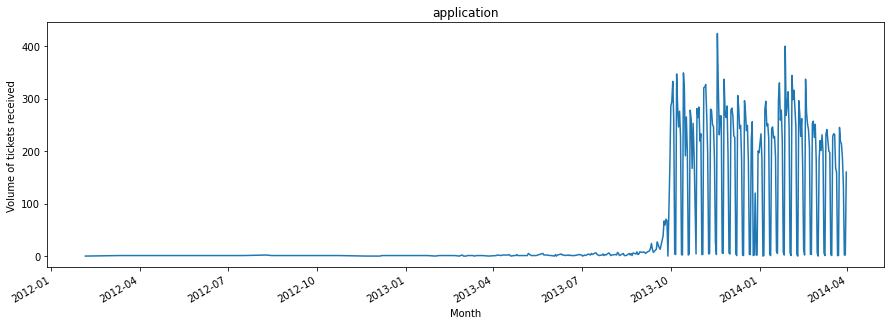

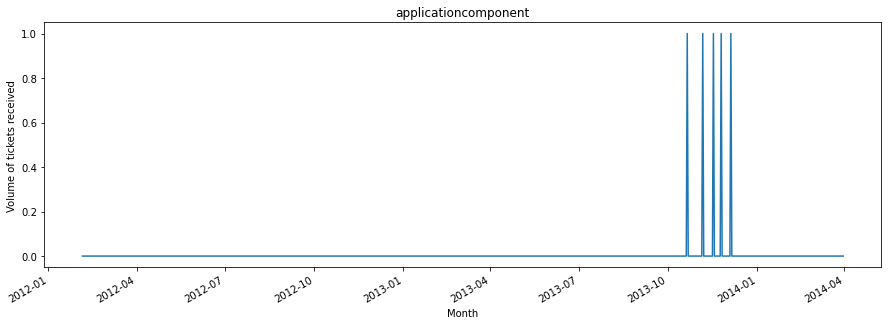

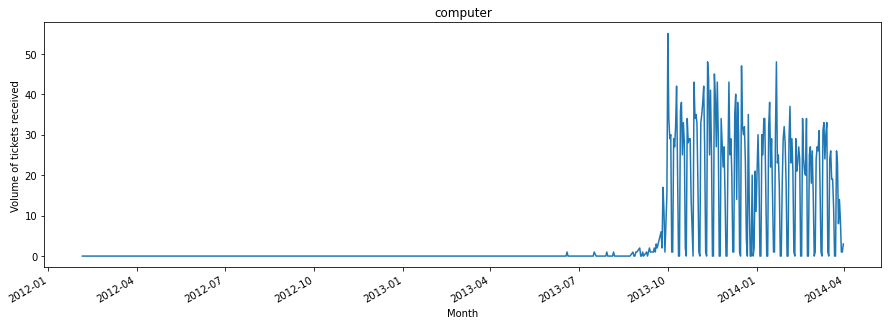

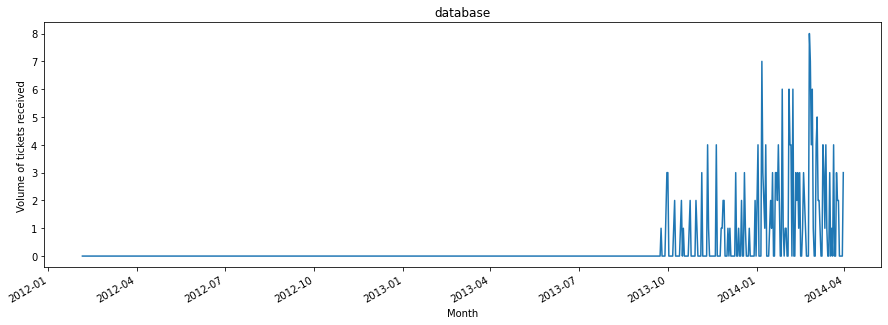

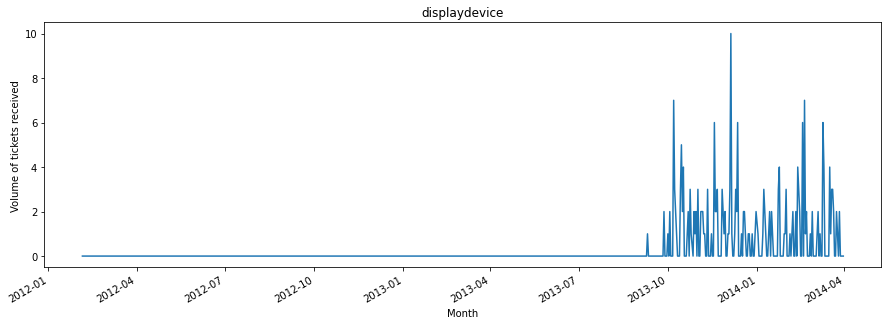

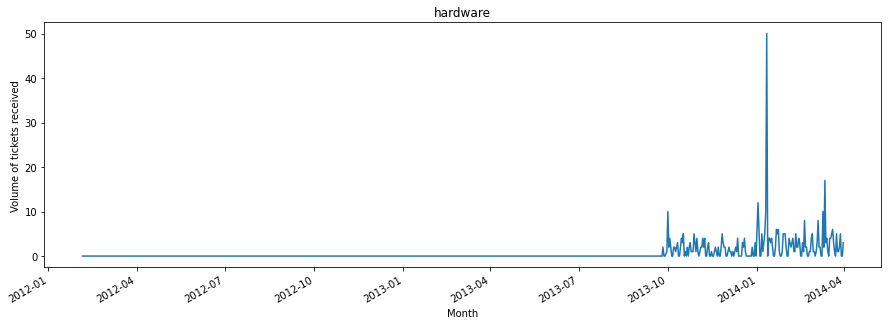

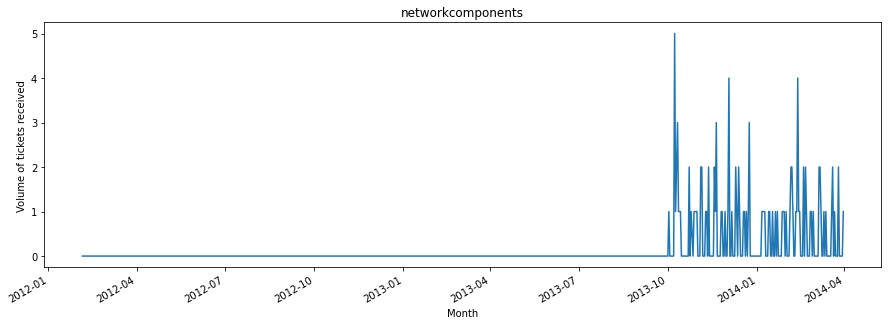

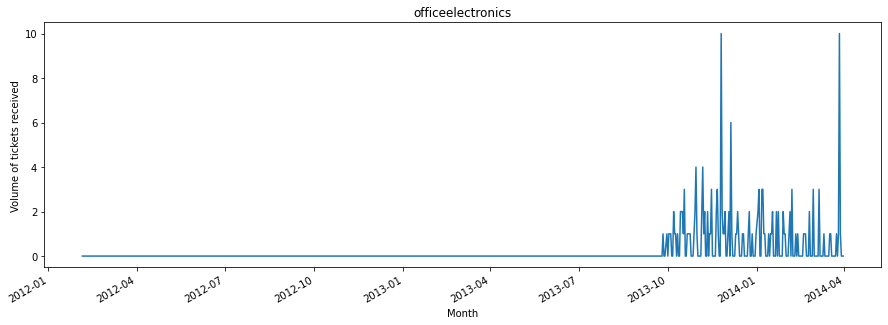

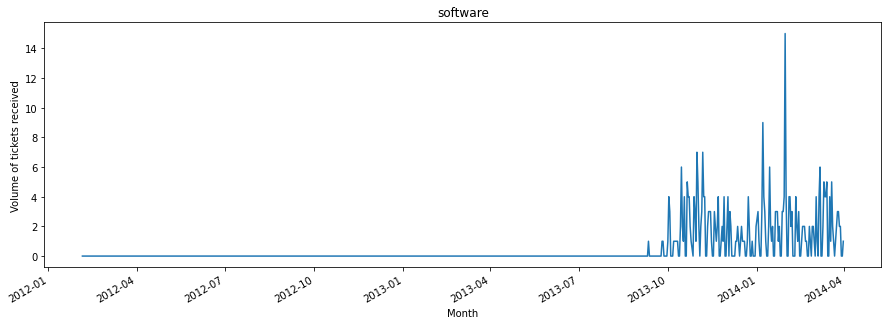

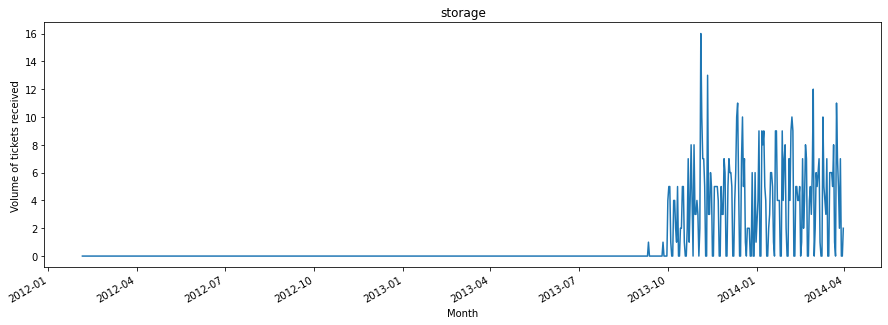

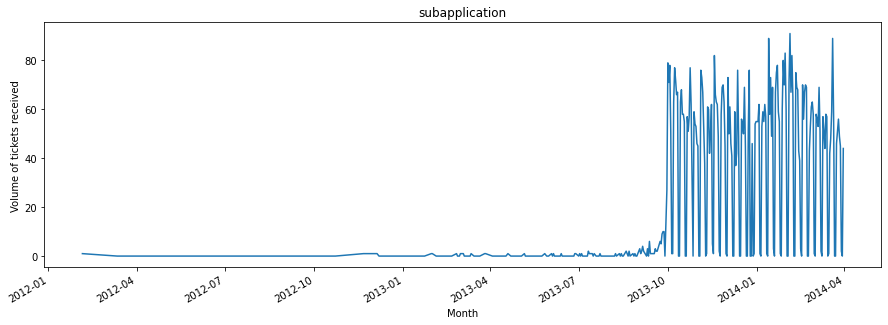

In [120]:
# Visualizing the tickets received in each category during the 3 years duration
for feature in CI_Cat_data.columns:
    CI_Cat_data[feature].plot(figsize=(15,5))
    plt.title(feature)
    plt.ylabel('Volume of tickets received')
    plt.xlabel('Month')
    plt.show()
    
# We can observe from the below plot that upto 4th quarter of the year 2013, the tickets received in CI_Cat category are-
# -almost 0. However we see incidents records in the year 2014 which continues until the end of the year
# from 2014 onwards we can see SEASONAL pattern in the volume of tickets received.
# The range of number of tickets received in each category in the year 2014 can be seen in the below plot.
# Category 'application' followed by 'subapplication' have received the most number of tickets.

In [121]:
# We can also observe that for all the categories, the volume till 2013/10 is almost 0. lets only focus on the volume after this
# Create a dataset starting from 2013/09 to 2014/04
CI_Cat_data_2013_2014 = CI_Cat_data['2013-09-01':'2014-03-31']
CI_Cat_data_2013_2014.head()

,application,applicationcomponent,computer,database,displaydevice,hardware,networkcomponents,officeelectronics,software,storage,subapplication
Open_Time,,,,,,,,,,,
2013-09-02,7.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2013-09-03,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-09-04,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2013-09-05,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2013-09-06,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [122]:
CI_Cat_data_2013_2014.shape

(202, 11)

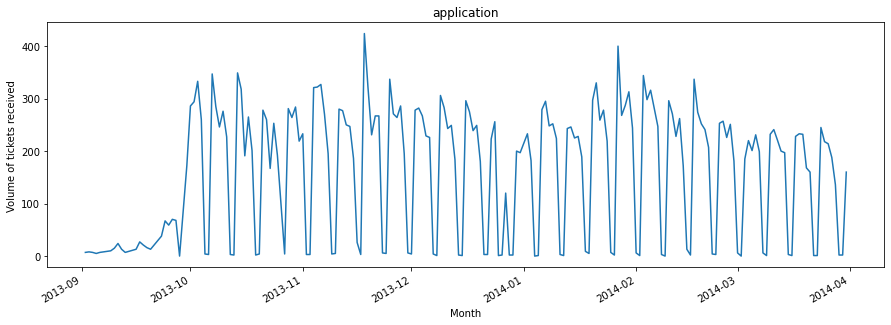

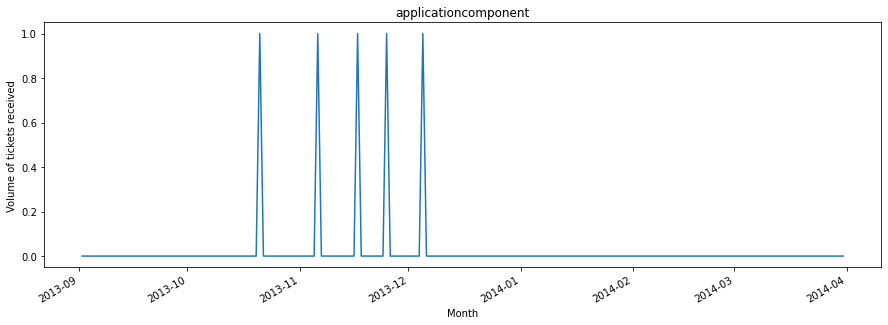

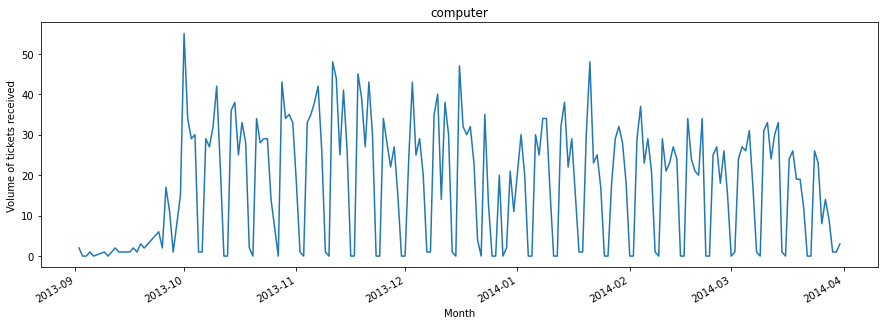

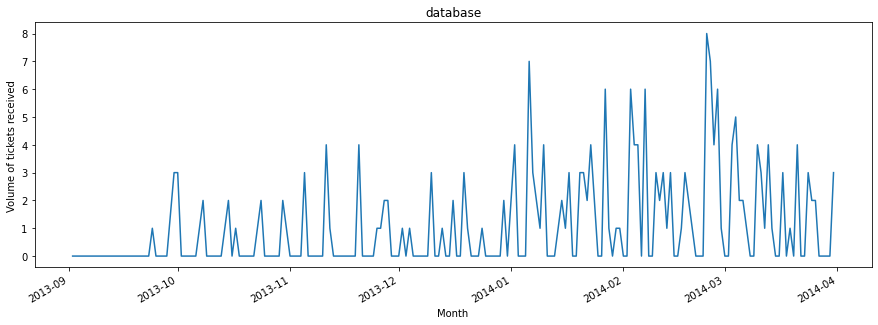

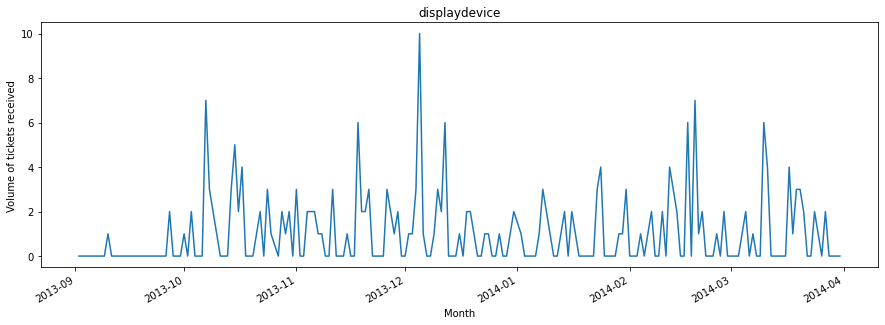

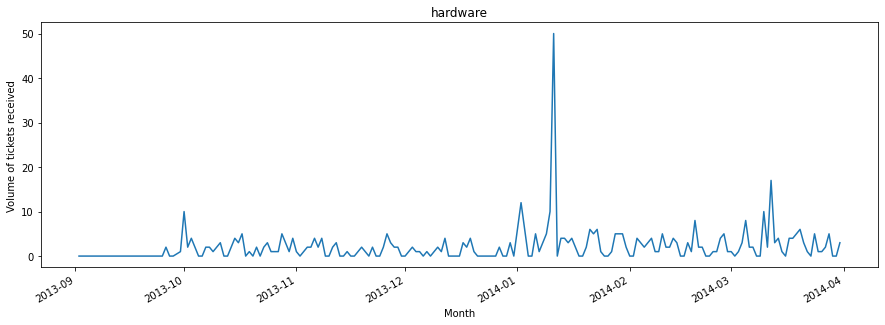

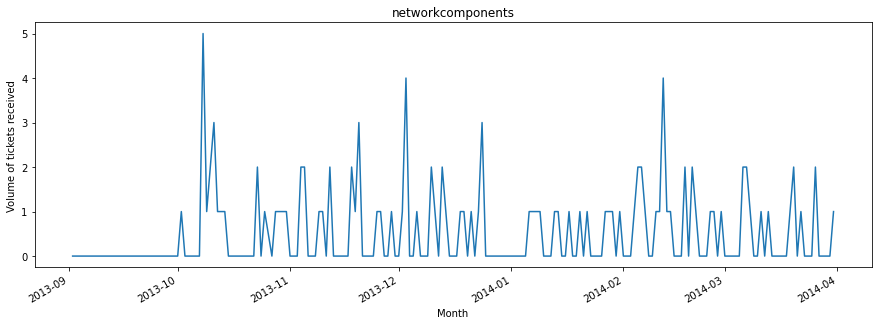

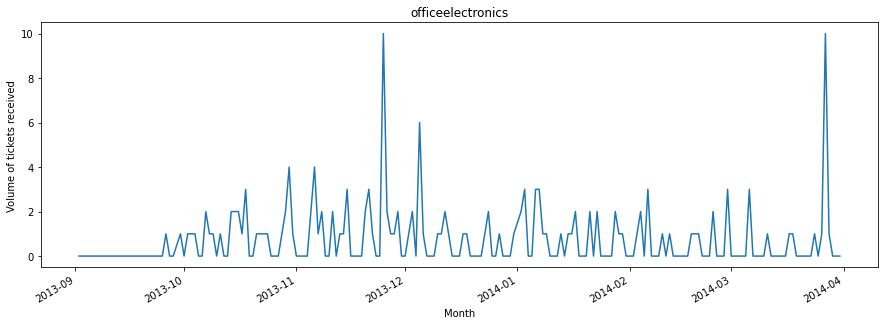

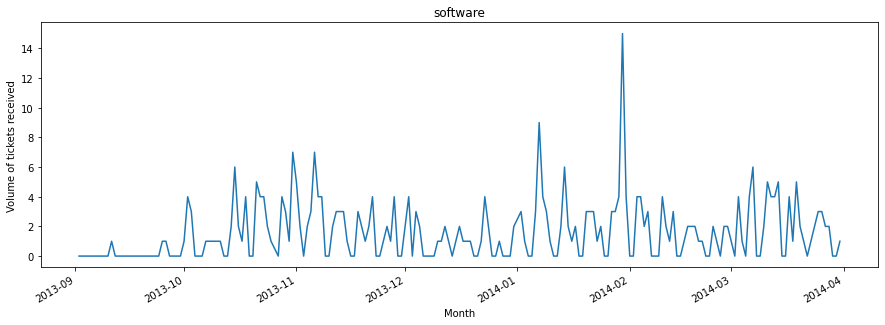

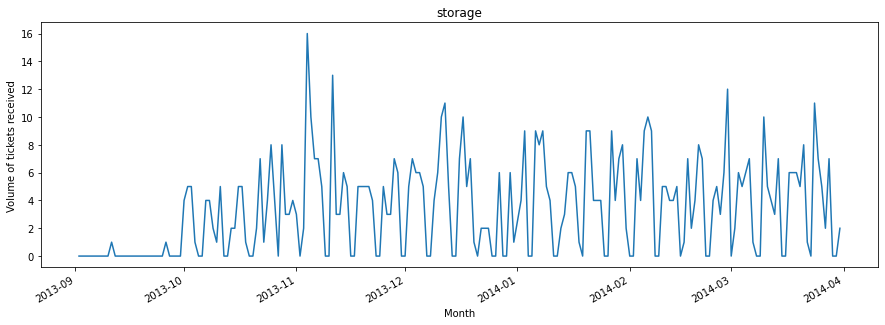

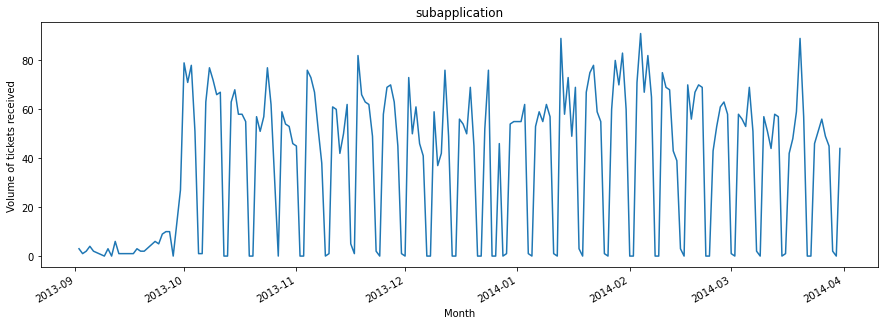

In [123]:
# PLot focussing on volume from 2013/08 to 2014/04:
for items in CI_Cat_data_2013_2014.columns:
    CI_Cat_data_2013_2014[items].plot(figsize=(15,5))
    plt.title(items)
    plt.ylabel('Volume of tickets received')
    plt.xlabel('Month')
    plt.show()

    

In [124]:
# Testing for stationarity by using dickey fuller test/ adfuller:
from statsmodels.tsa.stattools import adfuller

In [125]:
# Ho: it is not stationary
# H1: it is stationary

def adfuller_test(feature):
    result = adfuller(feature)
    labels = ['ADF Test Statistic','p-value','#Lags Used','No. of observations used']
    for value, label in zip(result, labels):
        print(label+':'+str(value))
    if result[1] <=0.05:
        print('Strong evidence against null hypothesis(Ho), reject null hypothesis. Data has NO unit root and is STATIONARY')
    else:
        print('Weak evidence against null hypothesis, time series has unit root indicating it is NON STATIONARY')
        

In [126]:
for feature in CI_Cat_data.columns:
    print(feature)
    adfuller_test(CI_Cat_data[feature])
    print()
    
# If p value is <= 0.05, the series is stationary. Else, non stationary   
# We can observe from the below output that the categories displaydevice and hardware are stationary and others non stattionary

application
ADF Test Statistic:-1.4803687059208652
p-value:0.5431993461099687
#Lags Used:14
No. of observations used:316
Weak evidence against null hypothesis, time series has unit root indicating it is NON STATIONARY

applicationcomponent
ADF Test Statistic:-1.8909461786930044
p-value:0.33633222781717975
#Lags Used:17
No. of observations used:313
Weak evidence against null hypothesis, time series has unit root indicating it is NON STATIONARY

computer
ADF Test Statistic:-1.4814902001543266
p-value:0.5426471950183209
#Lags Used:13
No. of observations used:317
Weak evidence against null hypothesis, time series has unit root indicating it is NON STATIONARY

database
ADF Test Statistic:-1.3167197941313937
p-value:0.6214886979004243
#Lags Used:16
No. of observations used:314
Weak evidence against null hypothesis, time series has unit root indicating it is NON STATIONARY

displaydevice
ADF Test Statistic:-3.2789544554783356
p-value:0.01584582334934794
#Lags Used:6
No. of observations used:3

In [ ]:
# In time series, what is an initial model, or baseline model or naïve model ? is that, for any given value at any given date,
# initially, the basic prediction or the best prediction is the previous date value.
# Ex, if sales at 1st January is 200, what is sale on 2nd jan? the best initial answer is 200.

In [127]:
# Baseline model: 
for feature in CI_Cat_data_2013_2014.columns:
    CI_Cat_data_2013_2014[feature+'_diff'] = CI_Cat_data_2013_2014[feature].diff(periods=1)
CI_Cat_data_2013_2014.head()

,application,applicationcomponent,computer,database,displaydevice,hardware,networkcomponents,officeelectronics,software,storage,subapplication,application_diff,applicationcomponent_diff,computer_diff,database_diff,displaydevice_diff,hardware_diff,networkcomponents_diff,officeelectronics_diff,software_diff,storage_diff,subapplication_diff
Open_Time,,,,,,,,,,,,,,,,,,,,,,
2013-09-02,7.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-03,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0
2013-09-04,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-09-05,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,-2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2013-09-06,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0


In [128]:
# Removing the first row from the dataset since it contains nan values:
CI_Cat_data_2013_2014.dropna(inplace=True)
CI_Cat_data_2013_2014.head()

,application,applicationcomponent,computer,database,displaydevice,hardware,networkcomponents,officeelectronics,software,storage,subapplication,application_diff,applicationcomponent_diff,computer_diff,database_diff,displaydevice_diff,hardware_diff,networkcomponents_diff,officeelectronics_diff,software_diff,storage_diff,subapplication_diff
Open_Time,,,,,,,,,,,,,,,,,,,,,,
2013-09-03,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0
2013-09-04,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-09-05,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,-2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2013-09-06,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0
2013-09-09,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0


In [129]:
# for this baseline model/ Naive model, lets determine the Rmse:
from sklearn.metrics import mean_squared_error

In [130]:
# Determining the RMSE for all the features of the dataset w.r.t the baseline model:
to_display = [feature for feature in CI_Cat_data_2013_2014.columns if 'diff' not in feature]
for feature in CI_Cat_data_2013_2014[to_display]:
    print(feature)
    print('RMSE:', mean_squared_error(CI_Cat_data_2013_2014[feature], CI_Cat_data_2013_2014[feature+'_diff'], squared=False))
    print()

application
RMSE: 203.85436465783545

applicationcomponent
RMSE: 0.15772007446912795

computer
RMSE: 23.400471994219238

database
RMSE: 1.953438096794969

displaydevice
RMSE: 1.9148542155126762

hardware
RMSE: 4.704713419349679

networkcomponents
RMSE: 0.9975093361076329

officeelectronics
RMSE: 1.550156467788612

software
RMSE: 2.578132302492296

storage
RMSE: 4.848962549963164

subapplication
RMSE: 48.635306463780715



# Modeling - Trying to create an ARIMA model for lesser RMSE

In [131]:
# Identification of AR model is often best done with pacf - Partial auto correlation factor - P
# Identification of MA model is often best done with acf - auto correlation factor - Q
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [132]:
diff_columns = [feature for feature in CI_Cat_data_2013_2014.columns if 'diff' in feature]
diff_columns

['application_diff',
 'applicationcomponent_diff',
 'computer_diff',
 'database_diff',
 'displaydevice_diff',
 'hardware_diff',
 'networkcomponents_diff',
 'officeelectronics_diff',
 'software_diff',
 'storage_diff',
 'subapplication_diff']

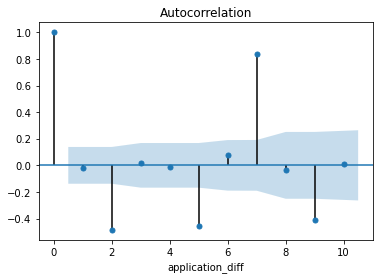

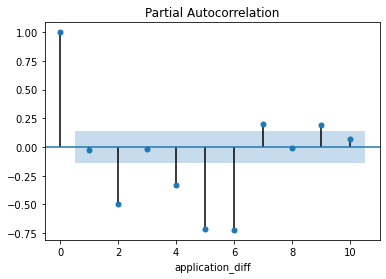

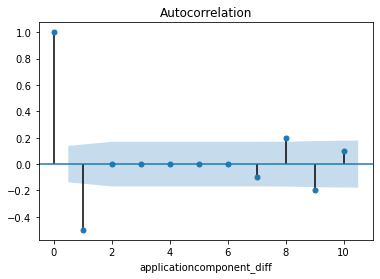

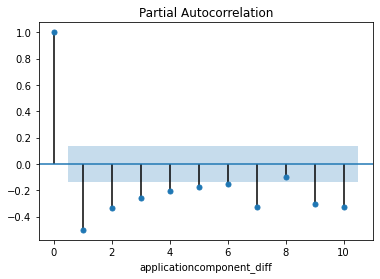

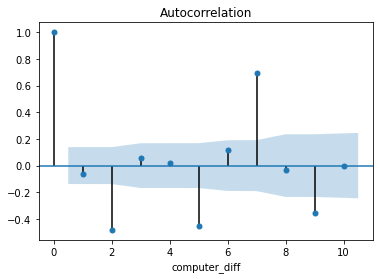

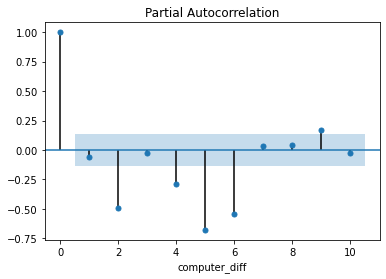

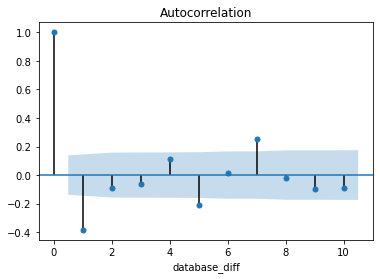

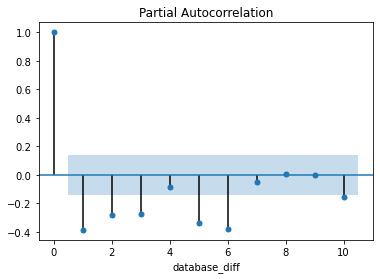

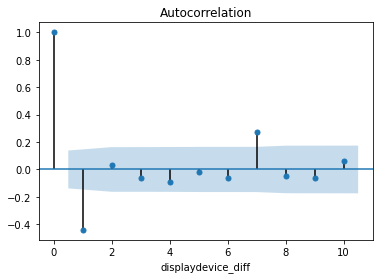

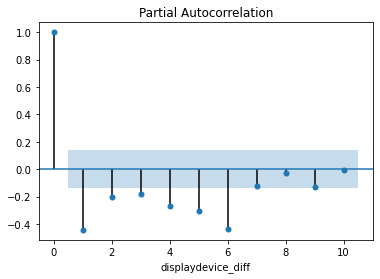

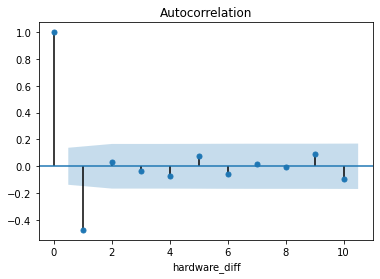

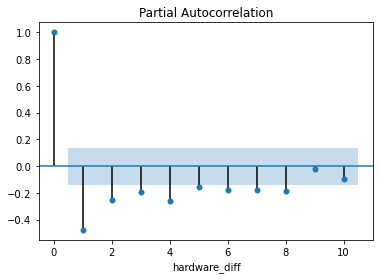

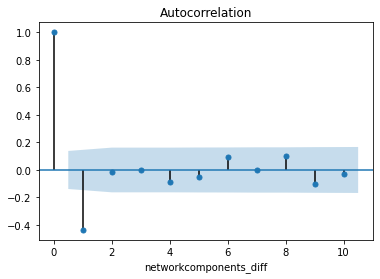

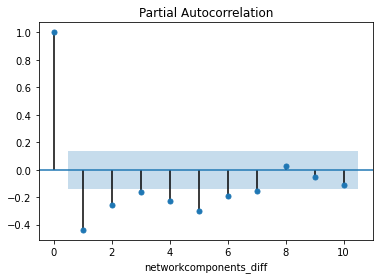

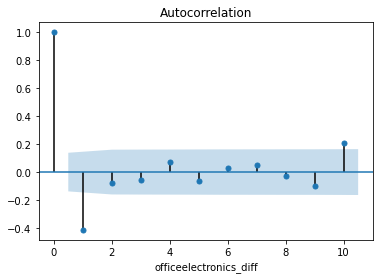

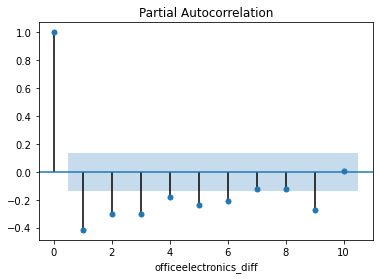

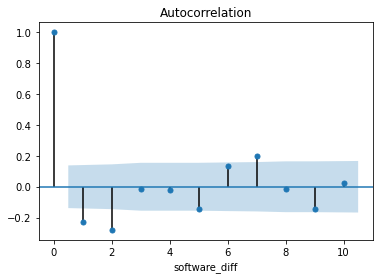

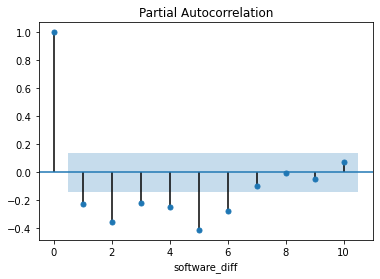

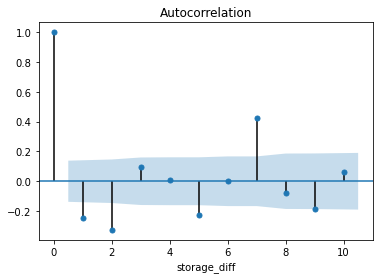

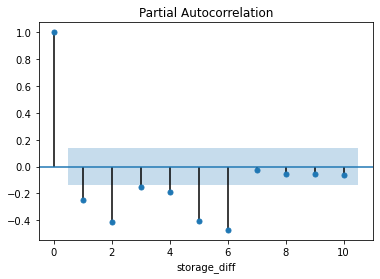

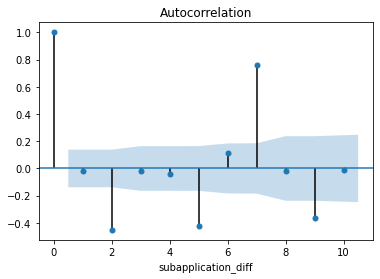

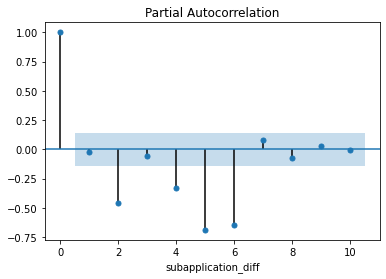

In [133]:
# The following are determined by using the acf and pacf plots:
# p -> Periods taken for autoregressive model
# q -> Integrated order, difference
# q -> Periods in moving average model
for feature in diff_columns:
    plot_acf(CI_Cat_data_2013_2014[feature].dropna(), lags=10)
    plt.xlabel(feature)
    plot_pacf(CI_Cat_data_2013_2014[feature].dropna(), lags=10)
    plt.xlabel(feature)

In [134]:
# For initializing the model, lets consider pdq values as (1,0,1) in an ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [135]:
CI_Cat_data_2013_2014.shape

(201, 22)

In [136]:
CI_Cat_data_2013_2014['2014-02-01':'2014-03-31'].shape

(59, 22)

In [137]:
# Defining train and test data:
# Using CI_Cat_data_2013_2014 dataset
# Lets use last 2 months data as Test data i.e from ['2014-02-01':'2014-03-31']
# The remaining data is training data. The test data considered above(59 instances) is 30% of the total (201 instances)

In [138]:
# Creating a test arima model:
feature = CI_Cat_data_2013_2014.application
train = feature[0:142]
test = feature[142:]
model_arima = ARIMA(train, order=(4,0,4))
model_arima_fit = model_arima.fit()
model_forecast = model_arima_fit.forecast(steps=59)[0]
print('AIC of ARIMA model:',model_arima_fit.aic)
print('RMSE of Baseline Model:', mean_squared_error(feature, CI_Cat_data_2013_2014.application_diff, squared=False))
print('RMSE of ARIMA model:' ,mean_squared_error(test,model_forecast, squared=False))

AIC of ARIMA model: 1665.166767007915
RMSE of Baseline Model: 203.85436465783545
RMSE of ARIMA model: 92.01359720493937


# ARIMA model Evaluation and PDQ Tuning:

In [139]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.7)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        y_pred = model_fit.forecast()[0]
        predictions.append(y_pred)
        history.append(test[t])
    # calculate out of sample error
    rmse = mean_squared_error(test, predictions, squared=False)
    return rmse

In [140]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(feature, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(feature, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE= %.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE= %.3f' % (best_cfg, best_score))

In [141]:
evaluate_arima_model(CI_Cat_data_2013_2014.application, (1,0,1))

94.457003877698

In [142]:
p_values = range(4,7)
d_values = range(0,3)
q_values = range(4,7)

In [143]:
# Tuning of pdq values: remove # for tuning
#evaluate_models(CI_Cat_data_2013_2014.application, p_values, d_values, q_values)

In [144]:
#From above, we can observe that best order = (4,0,4)
evaluate_arima_model(CI_Cat_data_2013_2014.application, (4,0,4))

48.200619445383005

In [145]:
# Similarly, other categories of features CI_Cat, CI_SubCat, Category can be modelled and evaluated based on requirement

# Predicting next two years volume

In [146]:
from pandas.tseries.offsets import DateOffset
future_dates= [CI_Cat_data_2013_2014.index[-1]+ DateOffset(months=x) for x in range (0,24)]

In [147]:
future_dates

[Timestamp('2014-03-31 00:00:00'),
 Timestamp('2014-04-30 00:00:00'),
 Timestamp('2014-05-31 00:00:00'),
 Timestamp('2014-06-30 00:00:00'),
 Timestamp('2014-07-31 00:00:00'),
 Timestamp('2014-08-31 00:00:00'),
 Timestamp('2014-09-30 00:00:00'),
 Timestamp('2014-10-31 00:00:00'),
 Timestamp('2014-11-30 00:00:00'),
 Timestamp('2014-12-31 00:00:00'),
 Timestamp('2015-01-31 00:00:00'),
 Timestamp('2015-02-28 00:00:00'),
 Timestamp('2015-03-31 00:00:00'),
 Timestamp('2015-04-30 00:00:00'),
 Timestamp('2015-05-31 00:00:00'),
 Timestamp('2015-06-30 00:00:00'),
 Timestamp('2015-07-31 00:00:00'),
 Timestamp('2015-08-31 00:00:00'),
 Timestamp('2015-09-30 00:00:00'),
 Timestamp('2015-10-31 00:00:00'),
 Timestamp('2015-11-30 00:00:00'),
 Timestamp('2015-12-31 00:00:00'),
 Timestamp('2016-01-31 00:00:00'),
 Timestamp('2016-02-29 00:00:00')]

In [148]:
CI_Cat_data_2013_2014.tail()

,application,applicationcomponent,computer,database,displaydevice,hardware,networkcomponents,officeelectronics,software,storage,subapplication,application_diff,applicationcomponent_diff,computer_diff,database_diff,displaydevice_diff,hardware_diff,networkcomponents_diff,officeelectronics_diff,software_diff,storage_diff,subapplication_diff
Open_Time,,,,,,,,,,,,,,,,,,,,,,
2014-03-27,188.0,0.0,14.0,0.0,2.0,2.0,0.0,10.0,2.0,2.0,49.0,-26.0,0.0,6.0,-2.0,2.0,1.0,-2.0,9.0,-1.0,-3.0,-7.0
2014-03-28,136.0,0.0,9.0,0.0,0.0,5.0,0.0,1.0,2.0,7.0,45.0,-52.0,0.0,-5.0,0.0,-2.0,3.0,0.0,-9.0,0.0,5.0,-4.0
2014-03-29,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-134.0,0.0,-8.0,0.0,0.0,-5.0,0.0,-1.0,-2.0,-7.0,-43.0
2014-03-30,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0
2014-03-31,160.0,0.0,3.0,3.0,0.0,3.0,1.0,0.0,1.0,2.0,44.0,158.0,0.0,2.0,3.0,0.0,3.0,1.0,0.0,1.0,2.0,44.0


In [149]:
predicitions = model_arima_fit.forecast(steps =24)[0]
predicitions

array([-10.96681421,  44.14862992, 243.89100555, 210.56296043,
       163.60376706, 254.20029019, 180.54381866,  16.97260307,
       102.39171441, 241.51337107, 182.60848416, 161.37301083,
       237.02530608, 156.7855367 ,  45.99531805, 142.37106049,
       230.10022025, 163.00303641, 163.59119933, 222.030189  ,
       141.74554081,  73.52046285, 167.8758498 , 214.89308422])

In [150]:
forecast = pd.DataFrame(predicitions, index=future_dates, columns= ['application_forecast'])
forecast[1:]
# The following application forecast indicates the volume of tickets likely to be received each month in the 
# - application category during the months april 2014 to february 2016

,application_forecast
2014-04-30,44.148630
2014-05-31,243.891006
2014-06-30,210.562960
2014-07-31,163.603767
2014-08-31,254.200290
2014-09-30,180.543819
2014-10-31,16.972603
2014-11-30,102.391714
2014-12-31,241.513371
2015-01-31,182.608484


## 3rd Business Problem: 
### 'Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.'
### Target - 'CI_SubCat
### Problem type - 'Classification'

In [151]:
# The first part of this problem that is tagging the tickets with right priortites has already been solved in 1st problem

In [152]:
# For tagging the tickets to their respective departments, lets assume the target as CI_Subcat
# If this category for the ticket is predicted, it shall be assigned to this department avoiding delays due to reassigning

In [153]:
dataset = pd.read_csv('encoded_data.csv')
dataset.head()

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Close_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Reopen_Y/N,Handle_Time,Idle_Time,FT_resolution
0,0,2741,11,57,137,0,4,4,4,0.601292,1,413,0,26.0,2012-02-05 13:32:00,2013-11-04 13:51:00,6,1.0,2.0,0.0,0,15312.0,0.0,1
1,1,2863,1,57,70,0,3,3,3,0.415050,1,456,0,33.0,2012-03-12 15:44:00,2013-12-02 12:36:00,10,1.0,1.0,0.0,1,15116.0,15116.0,0
2,2,990,1,10,74,0,4,3,4,0.517551,3,244,0,3.0,2012-03-29 12:36:00,2014-01-13 15:13:00,4,1.0,0.0,0.0,0,15722.0,0.0,1
3,3,2863,1,57,70,0,4,4,4,0.642927,1,456,0,13.0,2012-07-17 11:49:00,2013-11-14 09:31:00,5,1.0,0.0,0.0,0,11637.0,0.0,1
4,4,2863,1,57,70,0,4,4,4,0.345258,1,456,0,2.0,2012-08-10 11:01:00,2013-11-08 13:55:00,6,1.0,0.0,0.0,0,10922.0,0.0,1


In [154]:
# Defining X and y:
# In Classification Problem,Lets drop Open_time and Close time
X3 = dataset.drop(['Open_Time','Close_Time','CI_Subcat','Unnamed: 0'], axis=1)
y3 = dataset.CI_Subcat

In [155]:
# Defining train test split:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, random_state = 10, test_size = 0.25)

# Model Deployment and Evaluation for 3rd Problem:

In [156]:
#Using XGBoost Model:
model = XGBClassifier()
model.fit(X3_train,y3_train)
y3_predict = model.predict(X3_test)
print('Accuracy Score :',accuracy_score(y3_test, y3_predict))
print()
print('Precision_score',precision_score(y3_test, y3_predict, average='weighted'))
print()
print('Recall Score', recall_score(y3_test, y3_predict,average='weighted'))


Accuracy Score : 0.9975105159241137

Precision_score 0.9971864595633333

Recall Score 0.9975105159241137


In [157]:
pd.crosstab(y3_test, y3_predict)

col_0,1,2,3,4,5,6,7,9,10,11,13,14,17,19,20,21,22,23,25,26,27,29,30,31,32,35,36,37,40,41,42,43,45,46,47,48,49,51,53,54,57,58,60,61,62,63
CI_Subcat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0


In [158]:
# Since the target feature 'CI_Subcat' has more than 60 categories and some categories have only 1 to 5 values.
# There is a possibility of over training of the model thus giving high accuracy
# therefor lets check the cross validation score

In [159]:
from sklearn.model_selection import cross_val_score

In [160]:
cross_val_score(model, X3, y3, n_jobs=4, cv=5, scoring='accuracy')

array([0.99753219, 0.99774654, 0.99678077, 0.99731731, 0.99817577])

In [161]:
# The cross validation score is also acceptable. the model seems to be working fine.
# This could be used to predict the right department for a new ticket thus avoiding re assignments and related delay

## 4th Business Problem: 
### 'Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.'
### Target - 'RFC_Y/N' - (Requested for Change Yes/No)
### Problem type - 'Classification'

In [162]:
# Definition of a "Change"
# According to ITIL, a Change is "the addition, modification or removal of any authorized, planned, or supported service
# or service component that could have an effect on IT services." Most often, a change is an event that has been approved
# by the change authority, is evaluated and implemented while minimizing risk, adjusts the status of a configuration item (CI),
# and adds value to the business and its customers.

# Change Request or Request for Change (RFC)
# A change request is a formal proposal that can be submitted by a stakeholder in the organization or by a service user
# via the service desk, utilizing the request fulfillment process to alter a configuration item.

# More information about change management can be obtained from the following link:
#https://www.cherwell.com/it-service-management/library/essential-guides/essential-guide-to-itil-change-management/

In [163]:
# Approach to determine and predict Request for change for a particular incident:
# In the initial dataset, the features 'No. of Related changes' and 'Related change' indicates that request for change has taken place.
# 'Related change' mentioned the ID assigned for the requested change. some tickets have multivalue indicating multiple changes.
# 'No of related changes' indicates the No. of  change requests pertaining to the given ticket.

In [164]:
# In order to predict, a request for change for a given ticket, lets create a new feature 'RFC_Y/N'
# Which will indicate 1 and 0. 1 if RFC is present. 0 for absent

In [165]:
# Lets start with encoded and processed dataset:
dataset = pd.read_csv('encoded_data.csv')
dataset.head()

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Close_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Reopen_Y/N,Handle_Time,Idle_Time,FT_resolution
0,0,2741,11,57,137,0,4,4,4,0.601292,1,413,0,26.0,2012-02-05 13:32:00,2013-11-04 13:51:00,6,1.0,2.0,0.0,0,15312.0,0.0,1
1,1,2863,1,57,70,0,3,3,3,0.415050,1,456,0,33.0,2012-03-12 15:44:00,2013-12-02 12:36:00,10,1.0,1.0,0.0,1,15116.0,15116.0,0
2,2,990,1,10,74,0,4,3,4,0.517551,3,244,0,3.0,2012-03-29 12:36:00,2014-01-13 15:13:00,4,1.0,0.0,0.0,0,15722.0,0.0,1
3,3,2863,1,57,70,0,4,4,4,0.642927,1,456,0,13.0,2012-07-17 11:49:00,2013-11-14 09:31:00,5,1.0,0.0,0.0,0,11637.0,0.0,1
4,4,2863,1,57,70,0,4,4,4,0.345258,1,456,0,2.0,2012-08-10 11:01:00,2013-11-08 13:55:00,6,1.0,0.0,0.0,0,10922.0,0.0,1


In [166]:
dataset['No_of_Related_Changes'].value_counts()

0.0    46037
1.0      535
2.0       21
3.0        2
9.0        1
Name: No_of_Related_Changes, dtype: int64

In [167]:
dataset['RFC_Y/N'] = np.where((dataset['No_of_Related_Changes']==0) ,0,1)

In [168]:
dataset['RFC_Y/N'].value_counts()

0    46037
1      559
Name: RFC_Y/N, dtype: int64

In [169]:
dataset.head()

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Close_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Reopen_Y/N,Handle_Time,Idle_Time,FT_resolution,RFC_Y/N
0,0,2741,11,57,137,0,4,4,4,0.601292,1,413,0,26.0,2012-02-05 13:32:00,2013-11-04 13:51:00,6,1.0,2.0,0.0,0,15312.0,0.0,1,0
1,1,2863,1,57,70,0,3,3,3,0.415050,1,456,0,33.0,2012-03-12 15:44:00,2013-12-02 12:36:00,10,1.0,1.0,0.0,1,15116.0,15116.0,0,0
2,2,990,1,10,74,0,4,3,4,0.517551,3,244,0,3.0,2012-03-29 12:36:00,2014-01-13 15:13:00,4,1.0,0.0,0.0,0,15722.0,0.0,1,0
3,3,2863,1,57,70,0,4,4,4,0.642927,1,456,0,13.0,2012-07-17 11:49:00,2013-11-14 09:31:00,5,1.0,0.0,0.0,0,11637.0,0.0,1,0
4,4,2863,1,57,70,0,4,4,4,0.345258,1,456,0,2.0,2012-08-10 11:01:00,2013-11-08 13:55:00,6,1.0,0.0,0.0,0,10922.0,0.0,1,0


In [170]:
# Defining X and y:
# In Classification Problem,Lets drop Open_time and Close time
X4 = dataset.drop(['Open_Time','Close_Time','RFC_Y/N','Unnamed: 0'], axis=1)
y4 = dataset['RFC_Y/N']

In [171]:
# Defining train test split:
from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4, random_state = 10, test_size = 0.25)

In [172]:
# Since 0 and 1 in our target variable is highly imbalanced, Lets balance before model building

# Handling Imbalanced dataset / SMOTEing for 4th problem

In [173]:
smote = SMOTE(random_state=13, k_neighbors=2, n_jobs=4)
X4_train_smote, y4_train_smote = smote.fit_sample(X4_train.astype(float), y4_train)

In [174]:
from collections import Counter
print(Counter(y4_train))
print(Counter(y4_train_smote))

Counter({0: 34525, 1: 422})
Counter({0: 34525, 1: 34525})


# Model Deployment and Evaluation for 4th problem

In [175]:
#Using XGBoost Model:
model = XGBClassifier()
model.fit(X4_train_smote,y4_train_smote)
y4_predict = model.predict(X4_test)
print('Accuracy Score :',accuracy_score(y4_test, y4_predict))
print()
print('Precision_score',precision_score(y4_test, y4_predict, average='weighted'))
print()
print('Recall Score', recall_score(y4_test, y4_predict, average='weighted'))


Accuracy Score : 1.0

Precision_score 1.0

Recall Score 1.0


In [176]:
pd.crosstab(y4_test, y4_predict)

col_0,0,1
RFC_Y/N,,
0,11512,0
1,0,137


In [177]:
# Lets also verify the model with cross validation

In [178]:
cross_val_score(model, X4_train_smote, y4_train_smote, n_jobs=4, cv=5, scoring='accuracy')

array([1., 1., 1., 1., 1.])

In [179]:
# CRoss validation is yeilding an accuracy of 100%
# Lets check if the model is overfitted

# Determining Most Imp Features for predicting RFC:

In [180]:
# Using ExtraTree Classifier:
from sklearn.ensemble import ExtraTreesClassifier

In [181]:
model = ExtraTreesClassifier(n_estimators=5, criterion='entropy', max_features=10)

In [182]:
model.fit(X4_train_smote,y4_train_smote)

ExtraTreesClassifier(criterion='entropy', max_features=10, n_estimators=5)

In [183]:
feature_importance = model.feature_importances_

In [184]:
feature_importance_normalized = np.std([tree.feature_importances_ for tree in model.estimators_], axis = 0) 

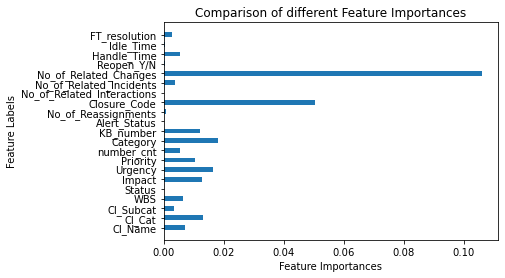

In [185]:
# Plotting a Bar Graph to compare the models 
plt.barh(X4.columns, feature_importance_normalized, height=0.5) 
plt.xlabel('Feature Importances') 
plt.ylabel('Feature Labels') 
plt.title('Comparison of different Feature Importances') 
plt.show()

In [186]:
# extra tree classifier gives us these important features as displayed above
# we can observe that RFC is greatly dependant on No. of related changes and closure code

In [187]:
# But these 2 features only come into picture once the ticket have been solved.
# Therefore we cannot let the model to be dependant on these 2 features for predicting RFC for a new ticket
# Also, dependancy on these 2 features makes the model over fitted

In [188]:
# Lets define the X and y again for remodelling by removing these 2 features

In [189]:
# Defining X and y:

X4 = dataset.drop(['Open_Time','Close_Time','RFC_Y/N', 'No_of_Related_Changes','Closure_Code', 'Unnamed: 0'], axis=1)
y4 = dataset['RFC_Y/N']

In [190]:
# Defining train test split:
from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4, random_state = 10, test_size = 0.25)

# Re SMOTEing for 4th problem remodelling

In [191]:
smote = SMOTE(random_state=13, k_neighbors=2, n_jobs=4)
X4_train_smote, y4_train_smote = smote.fit_sample(X4_train.astype(float), y4_train)

In [192]:
from collections import Counter
print(Counter(y4_train))
print(Counter(y4_train_smote))

Counter({0: 34525, 1: 422})
Counter({0: 34525, 1: 34525})


In [193]:
# verifying that the training dataset is correct
X4_train_smote.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,Reopen_Y/N,Handle_Time,Idle_Time,FT_resolution
0,2494.0,1.0,45.0,166.0,0.0,3.0,3.0,3.0,0.164930,1.0,727.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,2869.0,1.0,57.0,59.0,0.0,4.0,4.0,4.0,0.039780,1.0,1672.0,0.0,0.0,1.0,0.0,0.0,46.0,0.0,1.0
2,1545.0,3.0,21.0,73.0,0.0,4.0,5.0,4.0,0.351639,1.0,1061.0,0.0,7.0,1.0,0.0,0.0,282.0,0.0,1.0
3,1014.0,1.0,10.0,76.0,0.0,5.0,5.0,5.0,0.647257,3.0,401.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2709.0,11.0,57.0,59.0,0.0,5.0,5.0,5.0,0.679915,1.0,1205.0,0.0,0.0,1.0,0.0,0.0,597.0,0.0,1.0


# Re Modeling and Evaluation for 4th problem

In [194]:
#Using XGBoost Model:
model = XGBClassifier()
model.fit(X4_train_smote,y4_train_smote)
y4_predict = model.predict(X4_test)
print('Accuracy Score :',accuracy_score(y4_test, y4_predict))
print()
print('Precision_score',precision_score(y4_test, y4_predict, average='weighted'))
print()
print('Recall Score', recall_score(y4_test, y4_predict, average='weighted'))


Accuracy Score : 0.9781955532663748

Precision_score 0.9830830387200762

Recall Score 0.9781955532663748


In [195]:
pd.crosstab(y4_test, y4_predict)

col_0,0,1
RFC_Y/N,,
0,11348,164
1,90,47


In [196]:
# we can observe that though the evaluation metrics show a great number, but for predicting 1,
# the predicting ratio is 47/90 which means more than 70% values are wrongly predicted

In [197]:
# Lets also verify the model with cross validation

In [198]:
scores = cross_val_score(model, X4_train_smote, y4_train_smote, n_jobs=4, cv=5, scoring='accuracy')
scores

array([0.97907314, 0.99355539, 0.99225199, 0.99326575, 0.99319334])

In [200]:
# Cross validation shows improve in accuracy. therefore it is possible to increase the metrics of the model
# with hyper parameter tuning

# Hyper parameter optimization

In [201]:
# using RandomizedSearchCV
# set up the random search with 4 fold cross validation

In [202]:
from sklearn.model_selection import RandomizedSearchCV

In [203]:
# define the parameter dictionary to be taken by RandomCV

hyperparameter_grid = {
    'n_estimators': [100,200,500,600,1000],
    'max_depth': [5,10,15],
    'learning_rate': [0.025,0.05,0.1],
    'min_child_weight': [3,4,10],
    'booster': ['gbtree','gblinear'],
    'base_score': [0.1,0.2],
    'random_state': [0,10,13,17,40,45]
    }


In [204]:
random_cv = RandomizedSearchCV(estimator=model, param_distributions=hyperparameter_grid, 
                              cv=5, n_iter=50, scoring='neg_mean_absolute_error', n_jobs=4,
                              verbose=1, return_train_score=True, random_state=13)

In [205]:
#random_cv.fit(X4_train_smote, y4_train_smote)

In [206]:
# to check best fit parameters selected by random_cv,
#random_cv.best_params_

In [207]:
# to check best fit estimator with paramters.
#random_cv.best_estimator_

In [208]:
# Now use these paramters and re run the model with the best selected parameters

model = XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.025, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=None, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=45,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
# earlier,got error as, 'missing' = nan. replace nan with 'missing=None'

In [209]:
model.fit(X4_train_smote,y4_train_smote)
y4_predict = model.predict(X4_test)
print('Accuracy Score :',accuracy_score(y4_test, y4_predict))
print()
print('Precision_score',precision_score(y4_test, y4_predict, average='weighted'))
print()
print('Recall Score', recall_score(y4_test, y4_predict, average='weighted'))

Accuracy Score : 0.9799982831144304

Precision_score 0.9826777451825128

Recall Score 0.9799982831144304


In [210]:
pd.crosstab(y4_test, y4_predict)

col_0,0,1
RFC_Y/N,,
0,11375,137
1,96,41


In [ ]:
# we can observe that model performed better in earlier than after hyper parameter optimzation